
<center>

### $\text{Data Analysis ●• Mobile Big Data Analytics and Management}$
-------

$\text{Mapping Socioeconomic Air Quality Disparities In Rwanda} \\ \text{Using Sentinel-5P TROPOMI Data In Google Earth Engine}$


⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝ <br>
#### ●•    $\text{PRELIMINARY DATA ANALYSIS}$   •● <br/>
⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝⨝<br>
</center>

<br/></br>

- $\text{BAIMAM BOUKAR JEAN JACQUES | bbaimamb}\\$
- $\text{BERTIN NDAHAYO SINGIZWA | bndahayo}\\$
- $\text{UMUBYEYI EVELYNE | eumubyey}\\$
- $\text{KAMIKAZI NDAYIEYE RAISSA | rkamikaz} \\$

### $\text{Poverty Data Visualization}$

In [4]:
# Table C_10
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def extract_district_data(df, district_name, row_start, row_end, index):
    
    subset = df.iloc[row_start -3: row_end - 2].copy() if index else df.iloc[row_start-2: row_end - 1].copy()
    # print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    # subset.head(10)
    # print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    # Rename columns to something consistent. Adjust if you have more/less columns.
    if index:
        subset.columns = [
            "sector",
            "poor_percent",
            "avg_deprivation_intensity",
            "poverty_index",
        ]
    else:
        subset.columns = [
            "sector",
            "non_poor",
            "vulnerable",
            "moderately_poor",
            "severely_poor",
            "total",
            "count"
        ]


    subset["district"] = district_name

    return subset

def create_clean_data(file_path, table, index):
    df_raw = pd.read_excel(file_path, sheet_name=table)
    # print(df_raw.shape)
    # print(df_raw.head(5))
    
    district_intervals = [
        ("Nyarugenge", 5, 14),
        ("Gasabo", 16, 30),
        ("Kicukiro", 32, 41),
        ("Nyanza", 43, 52),
        ("Gisagara", 54, 66),
        ("Nyaruguru", 68, 81),
        ("Huye", 83, 96),
        ("Nyamagabe", 98, 114),
        ("Ruhango", 116, 124),
        ("Muhanga", 126, 137),
        ("Kamonyi", 139, 150),
        ("Karongi", 152, 164),
        ("Rutsiro", 166, 178),
        ("Rubavu", 180, 191),
        ("Nyabihu", 193, 204),
        ("Ngororero", 206, 218),
        ("Rusizi", 220, 237),
        ("Nyamasheke", 239, 253),
        ("Rulindo", 255, 271),
        ("Gakende", 273, 291),
        ("Musanze", 293, 307),
        ("Burera", 309, 325),
        ("Gicumbi", 327, 347),
        ("Rwamagana", 349, 362),
        ("Nyagatare", 364, 377),
        ("Gatsibo", 379, 392),
        ("Kayonza", 394, 405),
        ("Kirehe", 407, 418),
        ("Ngoma", 420, 433),
        ("Bugesera", 435, 449)
    ]

    frames = []
    for district_name, start, end in district_intervals:
        dist_df = extract_district_data(df_raw, district_name, start, end, index)
        frames.append(dist_df)

    df_clean = pd.concat(frames, ignore_index=True)

    return df_clean

In [35]:
df_pi = create_clean_data("poverty.xls", "Table_C_10",True)
df_pi.to_csv("data_with_poverty_index.csv", index=False)

In [3]:
poverty_data = pd.read_csv("clean_data.csv")
print(poverty_data.head())

         sector  non_poor  vulnerable  moderately_poor  severely_poor  total  \
0        Gitega      90.0         7.5              2.2            0.3    100   
1      Kanyinya      65.7        18.5             12.6            3.2    100   
2        Kigali      68.1        17.6             11.4            3.0    100   
3    Kimisagara      86.4         9.7              3.4            0.5    100   
4    Mageregere      56.3        18.7             18.1            6.9    100   

   count    district  
0  32945  Nyarugenge  
1  34608  Nyarugenge  
2  71619  Nyarugenge  
3  65713  Nyarugenge  
4  49847  Nyarugenge  


In [4]:
def plot_bar_chart(data, y, color):
    plt.figure(figsize=(20, 10))
    sns.barplot(x="district", y=y, data=data, errorbar=None, color=color)
    plt.title("Severely Poor and Vulnerable People per District")
    plt.xticks(rotation=90)
    plt.show()

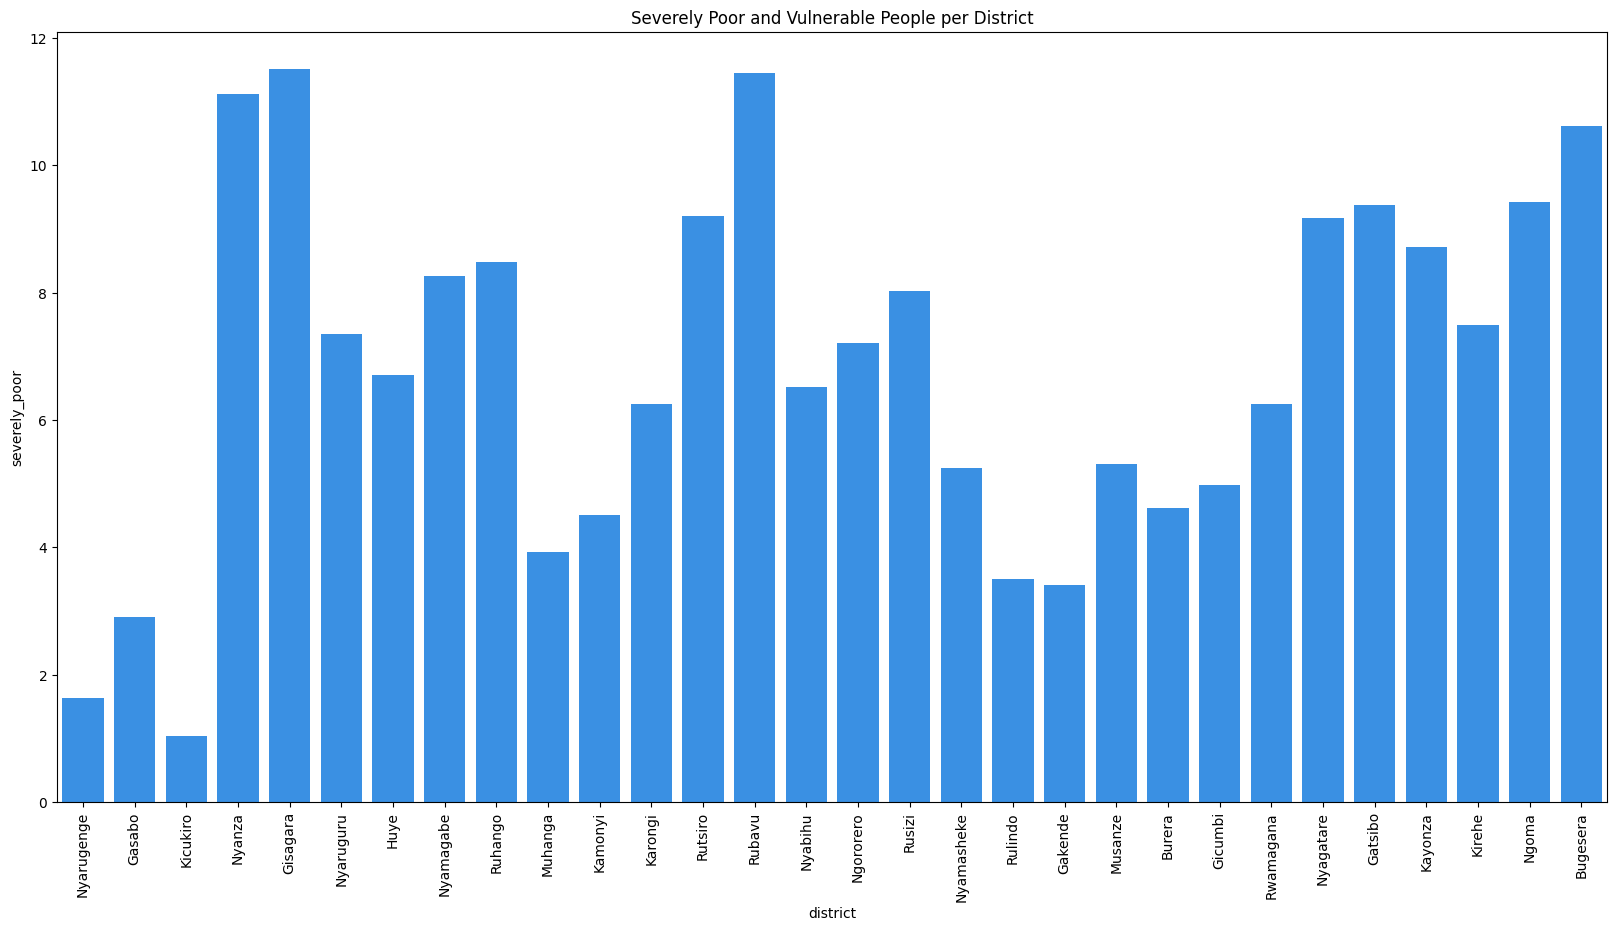

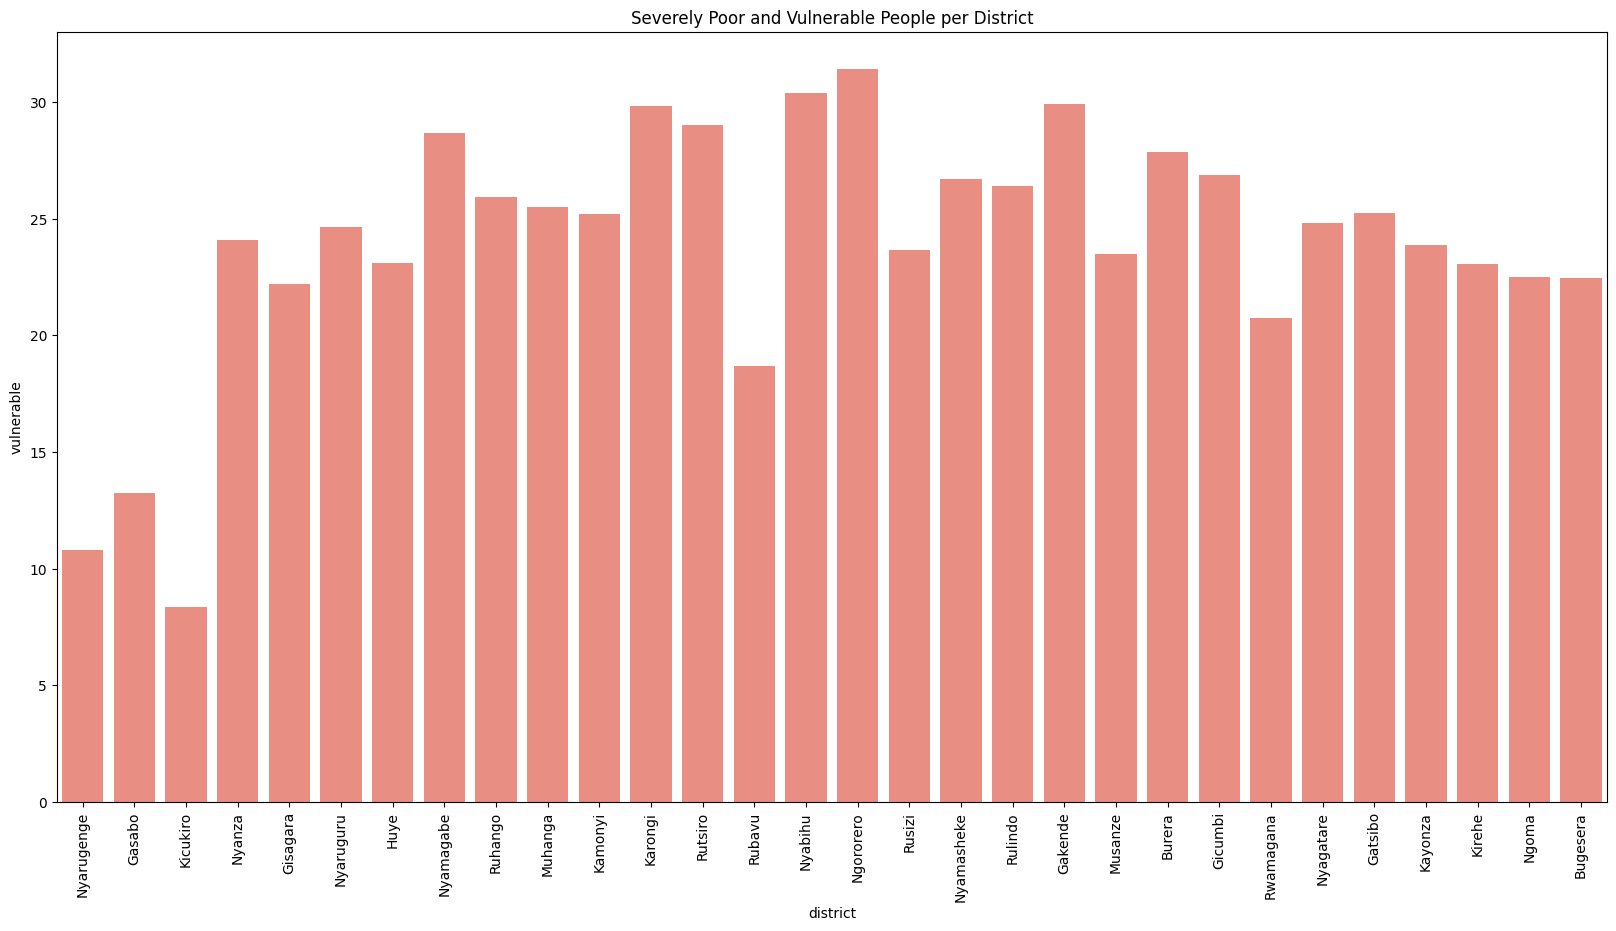

In [5]:
plot_bar_chart(data=poverty_data, y='severely_poor', color='dodgerblue')
plot_bar_chart(data=poverty_data, y='vulnerable', color='salmon')

In [6]:
def plot_pie_chart(df, district):
    district_data = df[df['district'] == district]
    if district_data.empty:
        raise ValueError(f"District '{district}' not found in the DataFrame.")
    district_row = district_data.iloc[0]

    labels = ['non_poor', 'vulnerable', 'moderately_poor', 'severely_poor']
    sizes = [district_row[label] for label in labels]
    colors = sns.color_palette('pastel')[0:4]

    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
    plt.title(f'Poverty Distribution in {district}', fontsize=14, pad=10)
    plt.axis('equal')
    plt.show()

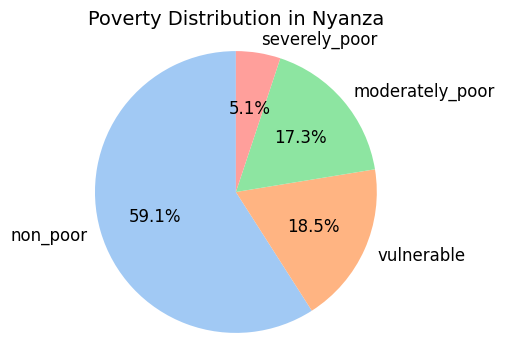

In [7]:
# for district in poverty_data['district'].unique():
#     plot_pie_chart(poverty_data, district)
plot_pie_chart(poverty_data, 'Nyanza')

Rwanda Poverty Dataset (2022) - First few rows:

Basic Statistics:

Missing Values:

Enhanced Dataset with Additional Metrics:

SUMMARY OF FINDINGS:
--------------------
1. Highest poverty index: 10.63 in Mageregere sector
2. Lowest poverty index: 0.70 in Muhima sector
3. Average poverty index across all sectors: 4.31
4. Total population analyzed: 281,927
5. Percentage of population classified as severely poor: 2.55%
6. Percentage of population classified as non-poor: 74.82%
7. Correlation between population density and poverty metrics:
   - Population and Poverty Index: r = 0.26, p-value = 0.6189


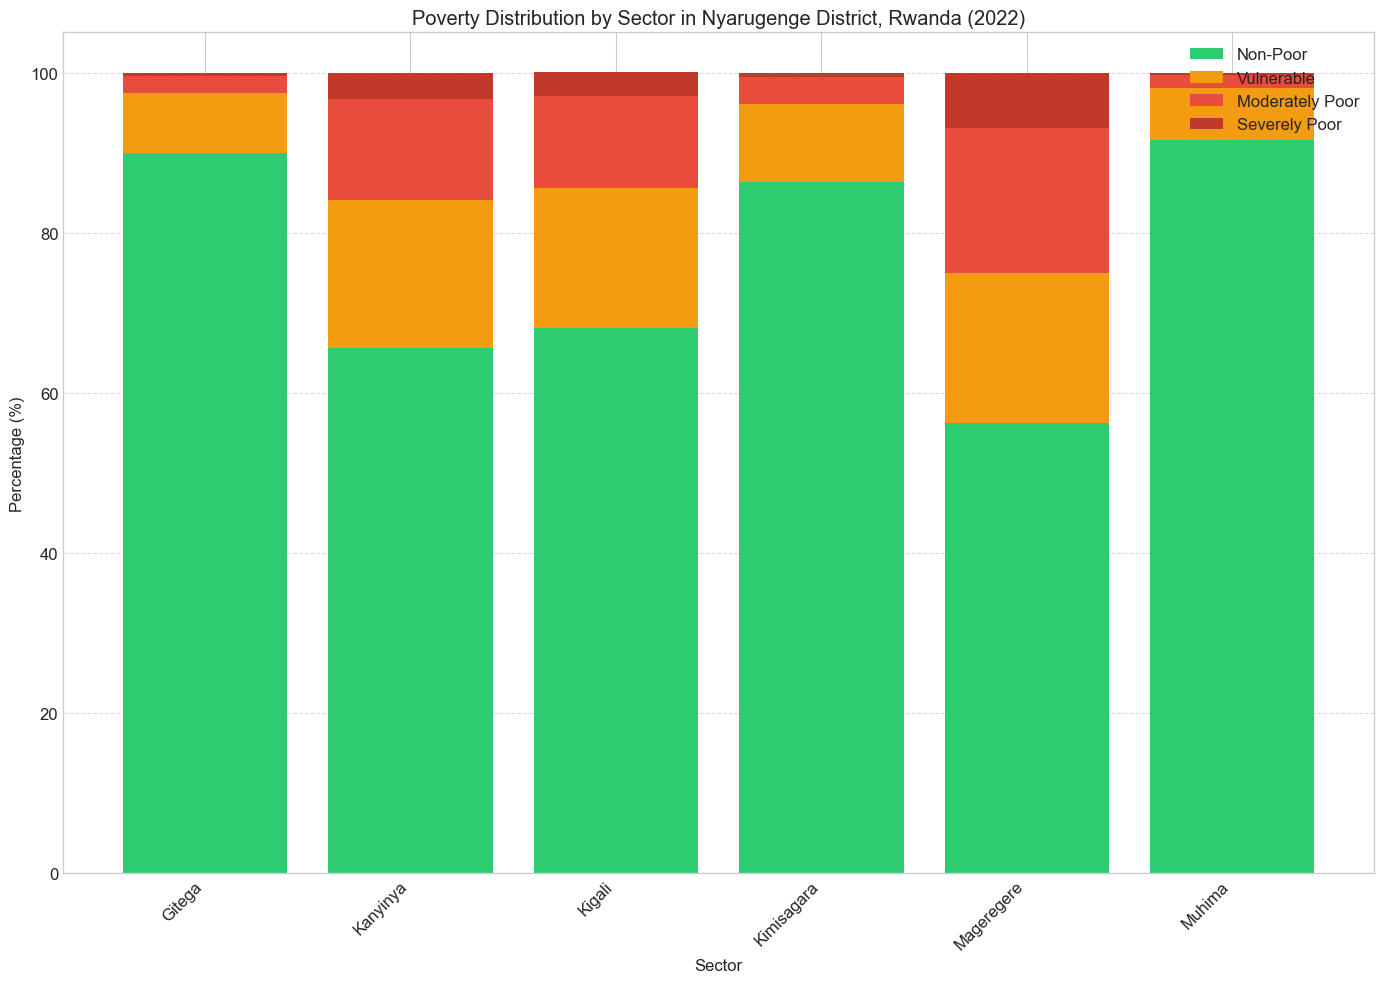

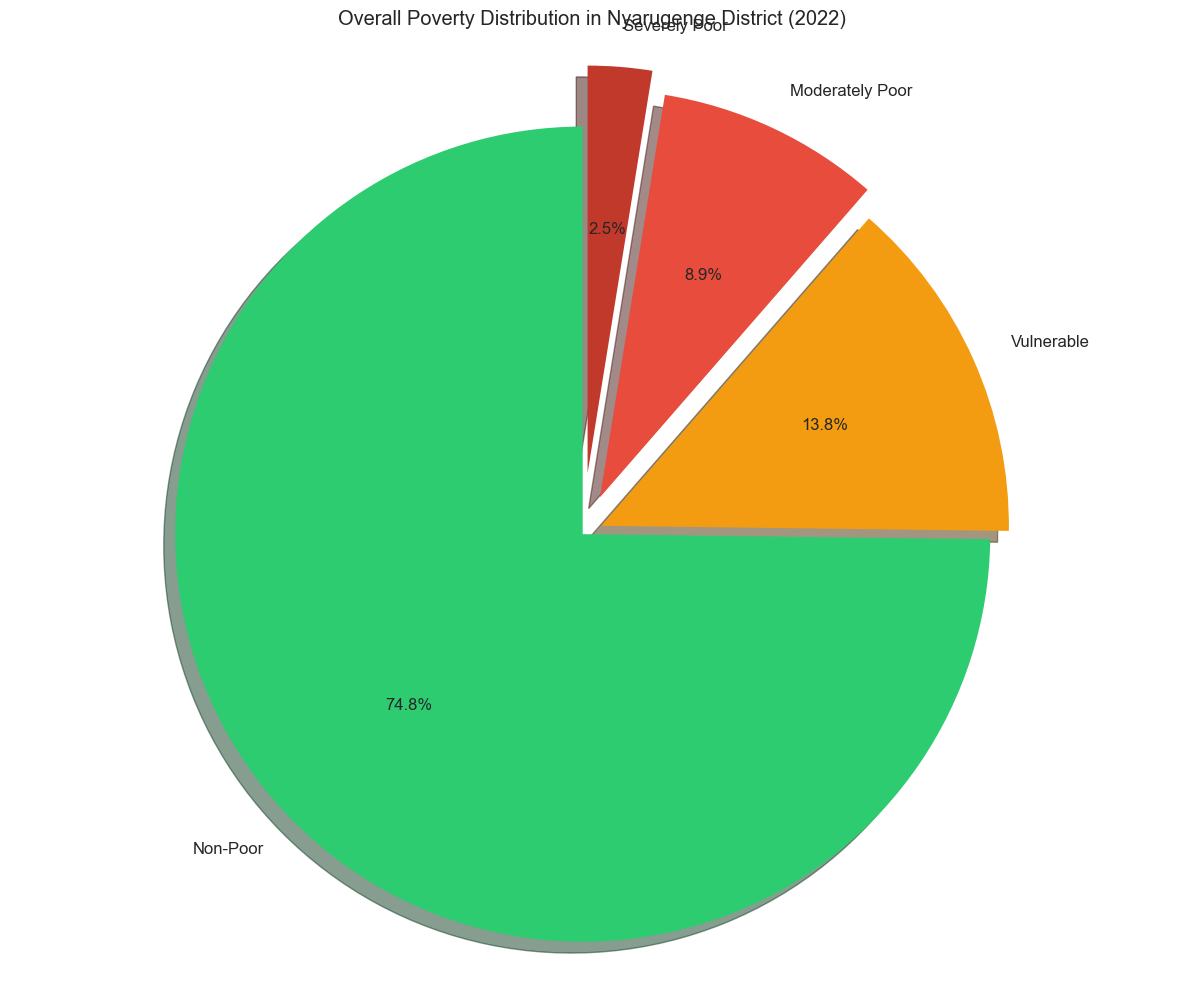

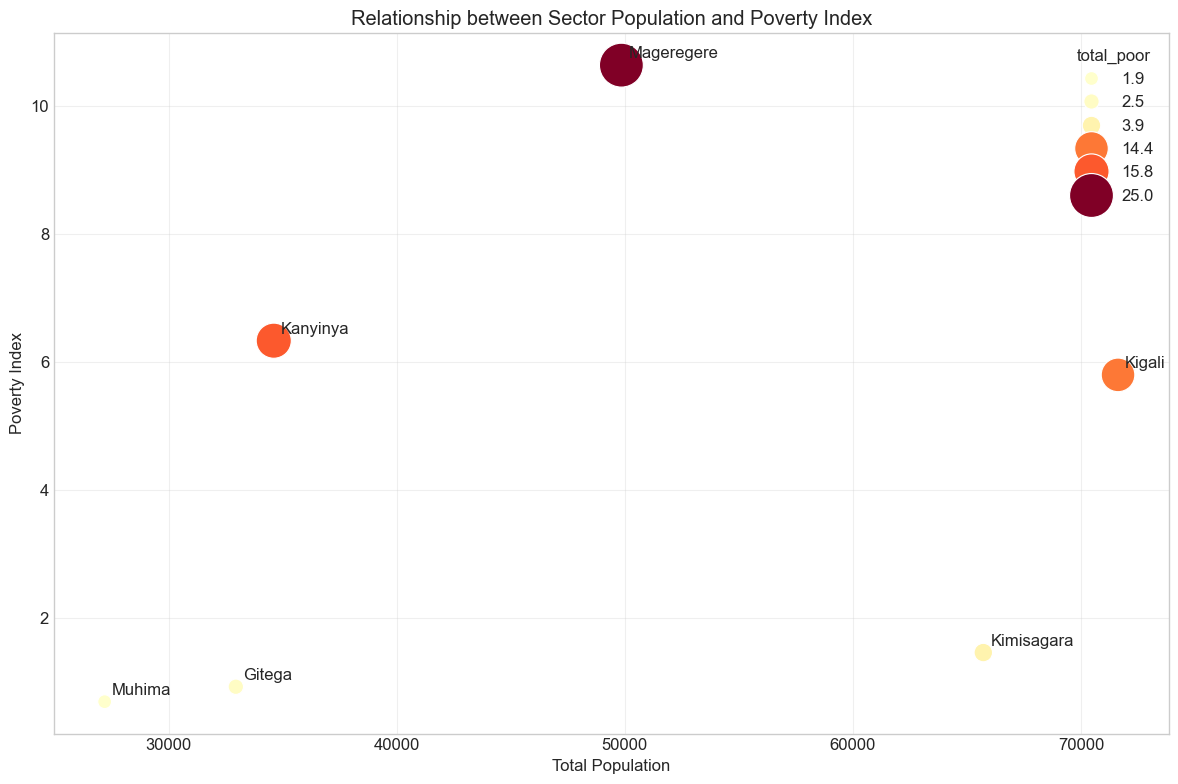

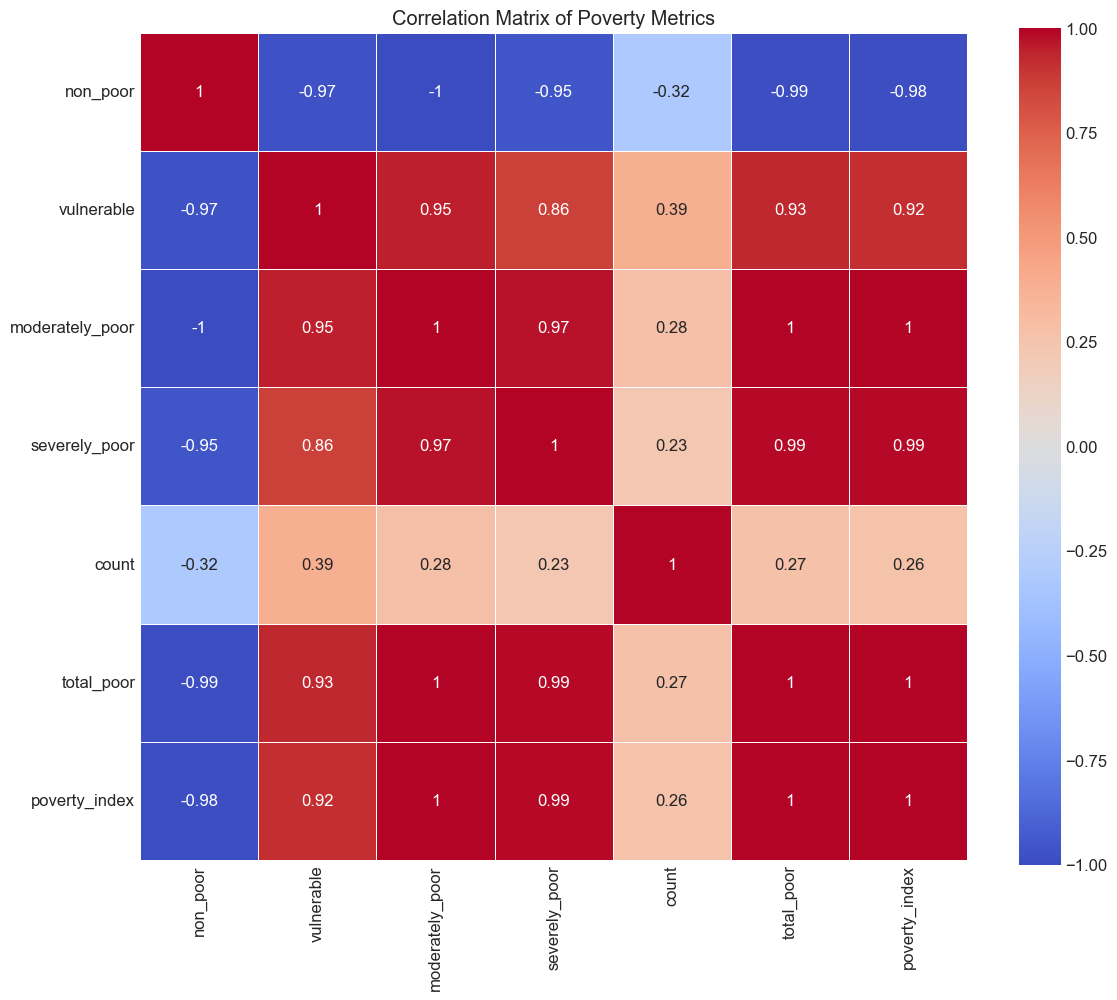

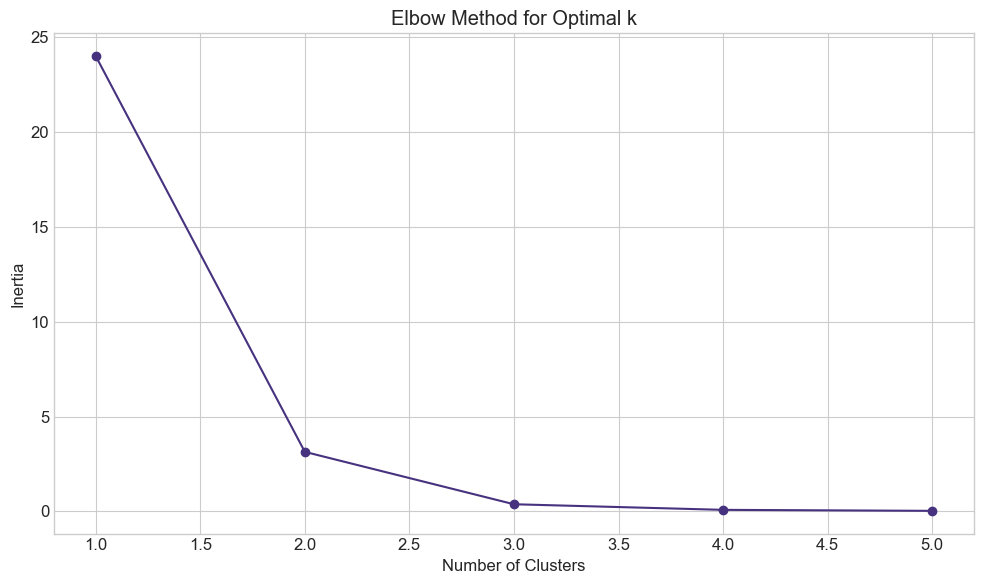

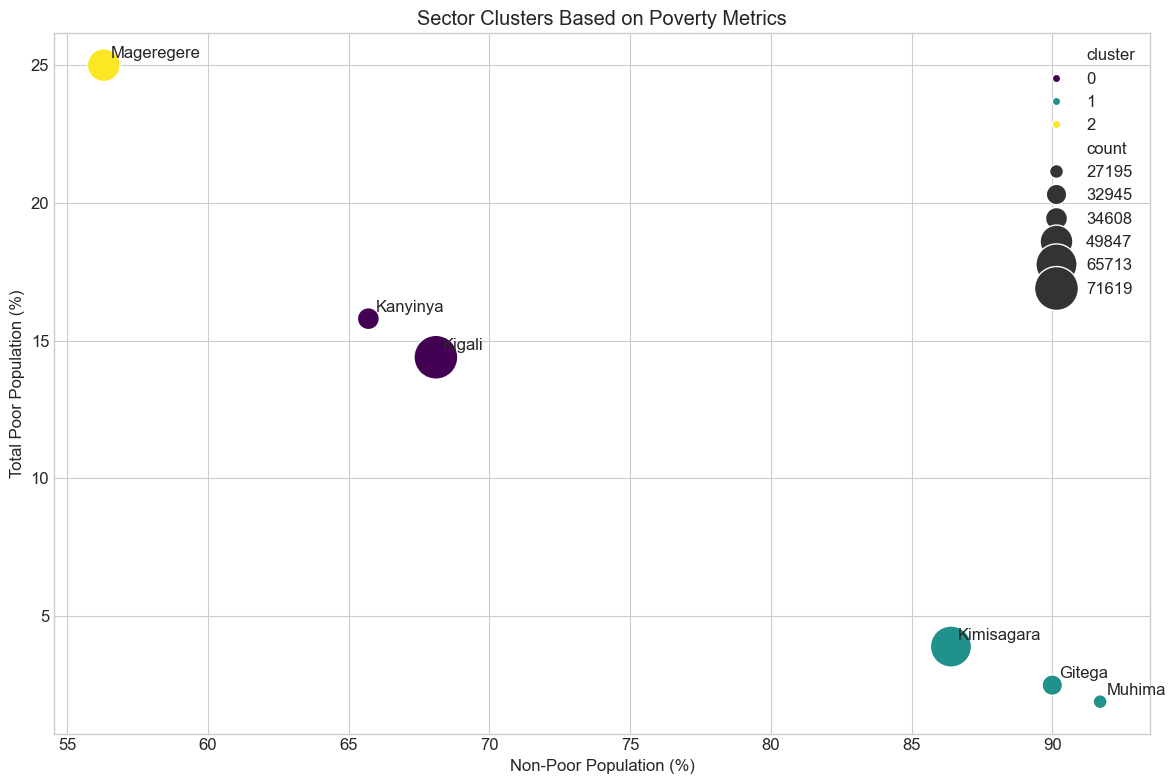

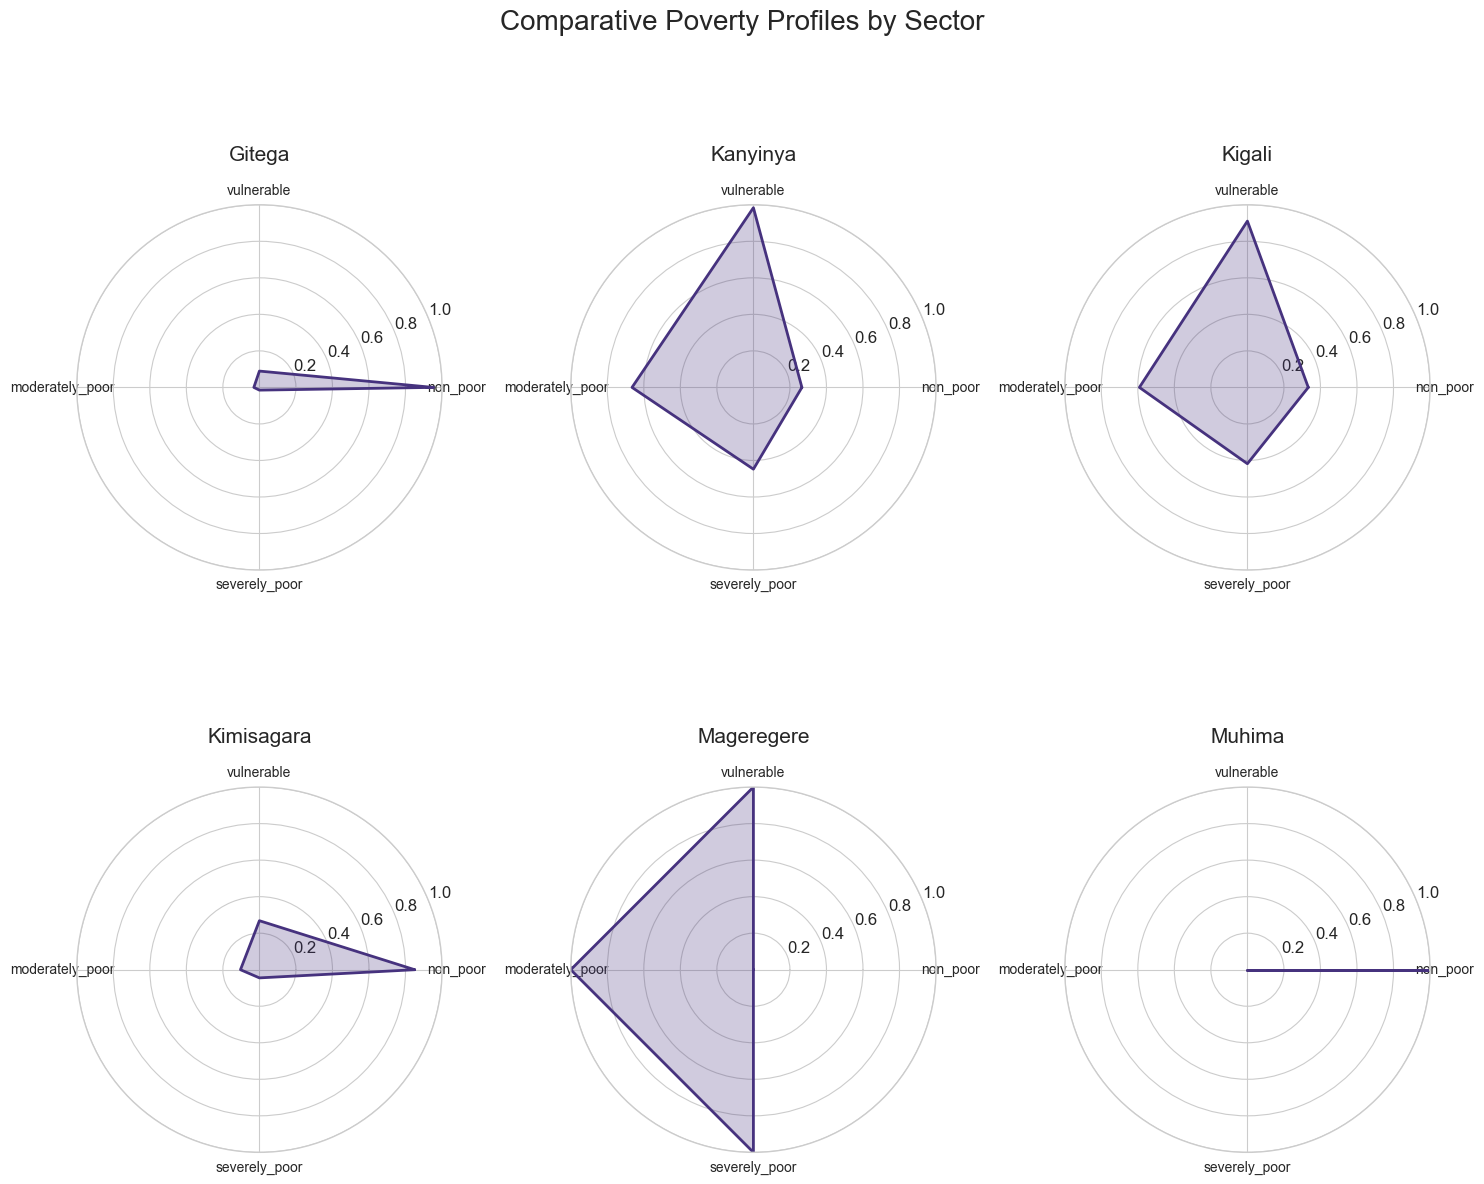

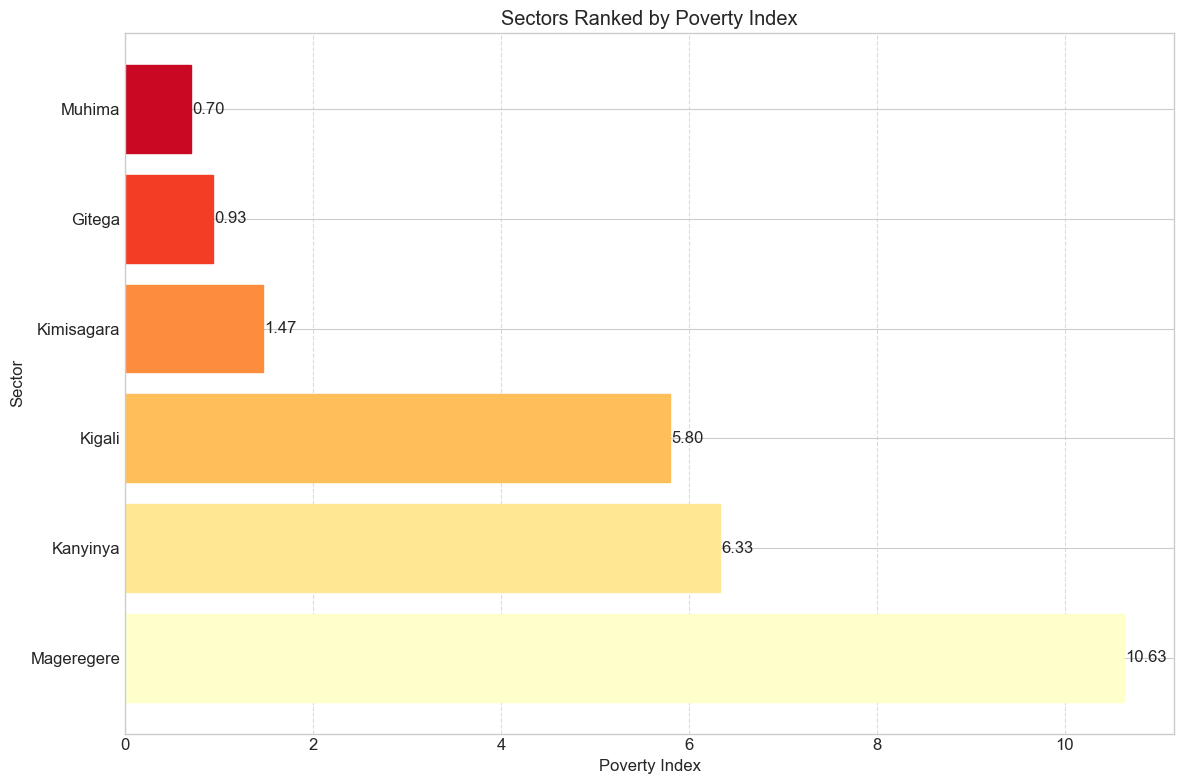

In [8]:
# Rwanda Poverty Data Analysis
# =================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plotting styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Data Loading and Preprocessing
# ---------------------------------

# Load the dataset
# Since we only have a few sample rows, we'll create the DataFrame from scratch
# In a real scenario, you would use: poverty_data = pd.read_csv('poverty_data.csv')

data = {
    'sector': ['Gitega', 'Kanyinya', 'Kigali', 'Kimisagara', 'Mageregere', 'Muhima'],
    'non_poor': [90, 65.7, 68.1, 86.4, 56.3, 91.7],
    'vulnerable': [7.5, 18.5, 17.6, 9.7, 18.7, 6.4],
    'moderately_poor': [2.2, 12.6, 11.4, 3.4, 18.1, 1.7],
    'severely_poor': [0.3, 3.2, 3.0, 0.5, 6.9, 0.2],
    'total': [100, 100, 100, 100, 100, 100],
    'count': [32945, 34608, 71619, 65713, 49847, 27195],
    'district': ['Nyarugenge', 'Nyarugenge', 'Nyarugenge', 'Nyarugenge', 'Nyarugenge', 'Nyarugenge']
}

poverty_data = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Rwanda Poverty Dataset (2022) - First few rows:")
poverty_data.head()

# Data Exploration
# ---------------------------------

# Basic statistics of the dataset
print("\nBasic Statistics:")
poverty_data.describe()

# Check for missing values
print("\nMissing Values:")
poverty_data.isnull().sum()

# Create a 'total_poor' column (moderately_poor + severely_poor)
poverty_data['total_poor'] = poverty_data['moderately_poor'] + \
    poverty_data['severely_poor']

# Create a 'poverty_index' column
# A weighted score where severely_poor has a higher weight than moderately_poor
poverty_data['poverty_index'] = (poverty_data['moderately_poor'] * 1 +
                                 poverty_data['severely_poor'] * 2) / 3

# Create a 'population_affected' column for each poverty category
for col in ['non_poor', 'vulnerable', 'moderately_poor', 'severely_poor', 'total_poor']:
    poverty_data[f'{col}_population'] = poverty_data[col] * \
        poverty_data['count'] / 100

# Display the enhanced dataset
print("\nEnhanced Dataset with Additional Metrics:")
poverty_data.head()

# Visualization 1: Poverty Distribution Across Sectors
# ---------------------------------

# Create a stacked bar chart showing poverty distribution by sector
plt.figure(figsize=(14, 10))
sectors = poverty_data['sector']
non_poor = poverty_data['non_poor']
vulnerable = poverty_data['vulnerable']
moderately_poor = poverty_data['moderately_poor']
severely_poor = poverty_data['severely_poor']

plt.bar(sectors, non_poor, label='Non-Poor', color='#2ecc71')
plt.bar(sectors, vulnerable, bottom=non_poor,
        label='Vulnerable', color='#f39c12')
plt.bar(sectors, moderately_poor, bottom=non_poor+vulnerable,
        label='Moderately Poor', color='#e74c3c')
plt.bar(sectors, severely_poor, bottom=non_poor+vulnerable+moderately_poor,
        label='Severely Poor', color='#c0392b')

plt.xlabel('Sector')
plt.ylabel('Percentage (%)')
plt.title('Poverty Distribution by Sector in Nyarugenge District, Rwanda (2022)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Visualization 2: Population Distribution by Poverty Level
# ---------------------------------

# Create a pie chart showing overall poverty distribution
plt.figure(figsize=(12, 10))

# Calculate total population in each category across all sectors
total_non_poor = poverty_data['non_poor_population'].sum()
total_vulnerable = poverty_data['vulnerable_population'].sum()
total_moderately_poor = poverty_data['moderately_poor_population'].sum()
total_severely_poor = poverty_data['severely_poor_population'].sum()

labels = ['Non-Poor', 'Vulnerable', 'Moderately Poor', 'Severely Poor']
sizes = [total_non_poor, total_vulnerable,
         total_moderately_poor, total_severely_poor]
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#c0392b']
explode = (0, 0.05, 0.1, 0.15)  # Explode slices for better visibility

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Overall Poverty Distribution in Nyarugenge District (2022)')
plt.tight_layout()

# Visualization 3: Relationship between Population and Poverty Index
# ---------------------------------

plt.figure(figsize=(12, 8))
sns.scatterplot(x='count', y='poverty_index', size='total_poor',
                hue='total_poor', data=poverty_data, sizes=(100, 1000),
                palette='YlOrRd')

plt.title('Relationship between Sector Population and Poverty Index')
plt.xlabel('Total Population')
plt.ylabel('Poverty Index')
plt.grid(True, alpha=0.3)

for i, row in poverty_data.iterrows():
    plt.annotate(row['sector'], (row['count'], row['poverty_index']),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()

# Visualization 4: Correlation Heatmap
# ---------------------------------

# Select numerical columns for correlation analysis
numerical_cols = ['non_poor', 'vulnerable', 'moderately_poor', 'severely_poor',
                  'count', 'total_poor', 'poverty_index']
correlation_matrix = poverty_data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Poverty Metrics')
plt.tight_layout()

# Visualization 5: Cluster Analysis
# ---------------------------------

# Prepare data for clustering
X = poverty_data[['non_poor', 'vulnerable',
                  'moderately_poor', 'severely_poor']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()

# Apply K-means clustering with the optimal number of clusters (for this example, we'll use k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
poverty_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualization of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='non_poor', y='total_poor', hue='cluster',
                size='count', data=poverty_data, palette='viridis',
                sizes=(100, 1000))

plt.title('Sector Clusters Based on Poverty Metrics')
plt.xlabel('Non-Poor Population (%)')
plt.ylabel('Total Poor Population (%)')

for i, row in poverty_data.iterrows():
    plt.annotate(row['sector'], (row['non_poor'], row['total_poor']),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()

# Visualization 6: Interactive Plotly Visualizations
# ---------------------------------

# Create an interactive bar chart
fig = px.bar(poverty_data, x='sector', y=['non_poor', 'vulnerable', 'moderately_poor', 'severely_poor'],
             title='Poverty Distribution by Sector (Interactive)',
             labels={'value': 'Percentage (%)',
                     'variable': 'Poverty Category'},
             color_discrete_map={
                 'non_poor': '#2ecc71',
                 'vulnerable': '#f39c12',
                 'moderately_poor': '#e74c3c',
                 'severely_poor': '#c0392b'
})

fig.update_layout(barmode='stack', xaxis_tickangle=-45)
# fig.show()  # Uncomment to show in Jupyter notebook

# Create an interactive scatter plot
fig2 = px.scatter(poverty_data, x='count', y='poverty_index',
                  size='total_poor', color='total_poor', hover_name='sector',
                  labels={'count': 'Total Population', 'poverty_index': 'Poverty Index',
                          'total_poor': 'Total Poor (%)'},
                  title='Population vs. Poverty Index by Sector')

# fig2.show()  # Uncomment to show in Jupyter notebook

# Visualization 7: Comparative Analysis
# ---------------------------------

# Normalize the data to create radar chart
categories = ['non_poor', 'vulnerable', 'moderately_poor', 'severely_poor']
max_values = poverty_data[categories].max()
min_values = poverty_data[categories].min()
normalized_data = (poverty_data[categories] -
                   min_values) / (max_values - min_values)

# Create radar chart for each sector
plt.figure(figsize=(15, 12))

# Set the number of sectors and angles for the radar chart
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Add subplot for each sector in the dataset
for i, sector in enumerate(poverty_data['sector']):
    ax = plt.subplot(2, 3, i+1, polar=True)

    # Get the normalized values for the current sector
    values = normalized_data.iloc[i].tolist()
    values += values[:1]  # Close the loop

    # Draw the radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=sector)
    ax.fill(angles, values, alpha=0.25)

    # Set category labels
    plt.xticks(angles[:-1], categories, size=10)

    # Set y-axis limits
    ax.set_ylim(0, 1)

    # Add title for each radar chart
    plt.title(sector, size=15, y=1.1)

plt.tight_layout()
plt.suptitle('Comparative Poverty Profiles by Sector', size=20, y=1.05)

# Visualization 8: Poverty Index Ranking
# ---------------------------------

# Sort sectors by poverty index
ranked_sectors = poverty_data.sort_values(by='poverty_index', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(ranked_sectors['sector'],
                ranked_sectors['poverty_index'], color='#3498db')

# Add a color gradient to the bars
for i, bar in enumerate(bars):
    bar.set_color(plt.cm.YlOrRd(i / len(ranked_sectors)))

plt.xlabel('Poverty Index')
plt.ylabel('Sector')
plt.title('Sectors Ranked by Poverty Index')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels to the end of each bar
for i, v in enumerate(ranked_sectors['poverty_index']):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center')

plt.tight_layout()

# Summary of Findings
# ---------------------------------

print("\nSUMMARY OF FINDINGS:")
print("--------------------")
print(
    f"1. Highest poverty index: {poverty_data['poverty_index'].max():.2f} in {poverty_data.loc[poverty_data['poverty_index'].idxmax(), 'sector']} sector")
print(
    f"2. Lowest poverty index: {poverty_data['poverty_index'].min():.2f} in {poverty_data.loc[poverty_data['poverty_index'].idxmin(), 'sector']} sector")
print(
    f"3. Average poverty index across all sectors: {poverty_data['poverty_index'].mean():.2f}")
print(f"4. Total population analyzed: {poverty_data['count'].sum():,}")
print(
    f"5. Percentage of population classified as severely poor: {(total_severely_poor / poverty_data['count'].sum() * 100):.2f}%")
print(
    f"6. Percentage of population classified as non-poor: {(total_non_poor / poverty_data['count'].sum() * 100):.2f}%")

# If we had the air quality index data per sector, we would add correlation analysis here
print("7. Correlation between population density and poverty metrics:")
if 'count' in poverty_data.columns:
    correlation_with_pop = stats.pearsonr(
        poverty_data['count'], poverty_data['poverty_index'])
    print(
        f"   - Population and Poverty Index: r = {correlation_with_pop[0]:.2f}, p-value = {correlation_with_pop[1]:.4f}")

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings('ignore')


class RwandaPovertyAnalysis:
    """
    Class for analyzing poverty data across Rwandan sectors.
    Uses geopandas for all spatial visualizations.
    """

    def __init__(self, output_dir="poverty_analysis_output"):
        """
        Initialize the Rwanda Poverty Analysis object.
        
        Args:
            output_dir (str): Directory where outputs will be saved
        """
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)

        # Initialize data containers
        self.sectors_gdf = None
        self.poverty_df = None
        self.merged_data = None

        print(
            f"Rwanda Poverty Analysis initialized. Outputs will be saved to {self.output_dir}")

    def load_poverty_data(self, data_file):
        """
        Load poverty data from a CSV file.
        
        Args:
            data_file (str): Path to a CSV file
            
        Returns:
            pd.DataFrame: The loaded poverty data
        """
        # Load from file
        self.poverty_df = pd.read_csv(data_file)

        # Clean sector names (remove leading/trailing whitespace)
        self.poverty_df['sector'] = self.poverty_df['sector'].str.strip()

        print(f"Loaded poverty data for {len(self.poverty_df)} sectors")
        print(f"Columns: {self.poverty_df.columns.tolist()}")

        # Save a copy of the cleaned data
        clean_csv_path = self.output_dir / 'clean_poverty_data.csv'
        self.poverty_df.to_csv(clean_csv_path, index=False)
        print(f"Saved cleaned poverty data to {clean_csv_path}")

        return self.poverty_df

    def load_shapefile(self, shapefile_path):
        """
        Load Rwanda sectors shapefile.
        
        Args:
            shapefile_path (str): Path to the shapefile
            
        Returns:
            gpd.GeoDataFrame: The loaded shapefile
        """
        self.sectors_gdf = gpd.read_file(shapefile_path)

        print(
            f"Loaded sectors shapefile with {len(self.sectors_gdf)} features")
        print(f"Shapefile columns: {self.sectors_gdf.columns.tolist()}")
        print(f"CRS: {self.sectors_gdf.crs}")

        return self.sectors_gdf

    def identify_join_field(self):
        """
        Identify the field in the shapefile that will be used to join with poverty data.
        
        Returns:
            str: The field name to use for joining
        """
        if self.sectors_gdf is None:
            raise ValueError("Shapefile must be loaded first")

        # Common name fields in shapefiles
        possible_fields = ['NAME', 'Name', 'SECTOR', 'name', 'Sector', 'sector',
                           'SECTOR_NAME', 'SectorName', 'District_N']

        # Check which fields exist in the shapefile
        available_fields = [
            field for field in possible_fields if field in self.sectors_gdf.columns]

        if not available_fields:
            print("Warning: Could not find standard name fields.")
            print(f"Available columns: {self.sectors_gdf.columns.tolist()}")
            # Look for any column with "name" in it
            name_fields = [col for col in self.sectors_gdf.columns
                           if 'name' in col.lower() or 'sector' in col.lower()]
            if name_fields:
                join_field = name_fields[0]
                print(f"Using '{join_field}' as the join field")
                return join_field
            else:
                raise ValueError(
                    "Could not identify a suitable field for joining")

        # Use the first available field
        join_field = available_fields[0]
        print(f"Using '{join_field}' as the join field")

        return join_field

    def merge_data(self, join_field=None):
        """
        Merge the poverty data with the shapefile.
        
        Args:
            join_field (str, optional): Field name in shapefile to join on
            
        Returns:
            gpd.GeoDataFrame: Merged data with poverty metrics and geometries
        """
        if self.sectors_gdf is None or self.poverty_df is None:
            raise ValueError(
                "Both shapefile and poverty data must be loaded first")

        if join_field is None:
            join_field = self.identify_join_field()

        # Create lowercase versions of keys for reliable joining
        self.sectors_gdf['join_key'] = self.sectors_gdf[join_field].str.lower(
        ).str.strip()
        self.poverty_df['join_key'] = self.poverty_df['sector'].str.lower(
        ).str.strip()

        # Check for potential mismatches
        shapefile_keys = set(self.sectors_gdf['join_key'])
        poverty_keys = set(self.poverty_df['join_key'])

        mismatched_keys = poverty_keys - shapefile_keys
        if mismatched_keys:
            print(
                f"Warning: {len(mismatched_keys)} sectors in poverty data not found in shapefile:")
            print(list(mismatched_keys))

        # Merge the data - using left join to preserve geometry
        self.merged_data = self.sectors_gdf.merge(
            self.poverty_df, on='join_key', how='inner')

        print(f"Merged data contains {len(self.merged_data)} sectors")

        # Calculate additional poverty metrics
        self.calculate_poverty_metrics()

        # Save the merged data
        merged_csv_path = self.output_dir / 'merged_poverty_sectors.csv'
        self.merged_data.drop(columns=['geometry']).to_csv(
            merged_csv_path, index=False)

        # Save as GeoJSON for GIS use
        merged_geojson_path = self.output_dir / 'merged_poverty_sectors.geojson'
        self.merged_data.to_file(merged_geojson_path, driver='GeoJSON')

        print(
            f"Saved merged data to {merged_csv_path} and {merged_geojson_path}")

        return self.merged_data

    def calculate_poverty_metrics(self):
        """
        Calculate additional poverty metrics.
        
        Returns:
            gpd.GeoDataFrame: Data with additional metrics
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")

        # Calculate poverty severity (moderately_poor + severely_poor)
        self.merged_data['poverty_rate'] = self.merged_data['moderately_poor'] + \
            self.merged_data['severely_poor']

        # Calculate weighted poverty index
        # Higher weights for more severe poverty
        self.merged_data['poverty_index'] = (
            self.merged_data['severely_poor'] * 4 +
            self.merged_data['moderately_poor'] * 3 +
            self.merged_data['vulnerable'] * 2 +
            self.merged_data['non_poor'] * 1
        ) / 10  # Max value would be 10 if all severely poor

        # Calculate affluence index (inverse of poverty)
        self.merged_data['affluence_index'] = (
            self.merged_data['non_poor'] * 4 +
            self.merged_data['vulnerable'] * 2
        ) / (4 + 2)  # Normalize by sum of weights

        # Calculate poverty per capita (total poor people)
        self.merged_data['poor_population'] = (
            self.merged_data['count'] * (self.merged_data['moderately_poor'] +
                                         self.merged_data['severely_poor']) / 100
        )

        # Calculate severely poor population
        self.merged_data['severely_poor_population'] = (
            self.merged_data['count'] * self.merged_data['severely_poor'] / 100
        )

        # Calculate non-poor population (affluent)
        self.merged_data['non_poor_population'] = (
            self.merged_data['count'] * self.merged_data['non_poor'] / 100
        )

        print("Calculated additional poverty metrics")

        return self.merged_data

    def summarize_by_district(self):
        """
        Create a summary of poverty metrics by district.
        
        Returns:
            pd.DataFrame: Summary statistics by district
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")

        # Group by district and calculate statistics
        district_summary = self.merged_data.groupby('district').agg({
            'count': 'sum',
            'non_poor': 'mean',
            'vulnerable': 'mean',
            'moderately_poor': 'mean',
            'severely_poor': 'mean',
            'poverty_rate': 'mean',
            'poverty_index': 'mean',
            'affluence_index': 'mean',
            'poor_population': 'sum',
            'severely_poor_population': 'sum',
            'non_poor_population': 'sum'
        }).reset_index()

        # Calculate weighted averages based on population
        for district in district_summary['district']:
            district_data = self.merged_data[self.merged_data['district'] == district]
            total_population = district_data['count'].sum()

            # Calculate weighted averages
            district_summary.loc[district_summary['district'] == district, 'weighted_non_poor'] = (
                (district_data['non_poor'] *
                 district_data['count']).sum() / total_population
            )
            district_summary.loc[district_summary['district'] == district, 'weighted_vulnerable'] = (
                (district_data['vulnerable'] *
                 district_data['count']).sum() / total_population
            )
            district_summary.loc[district_summary['district'] == district, 'weighted_moderately_poor'] = (
                (district_data['moderately_poor'] *
                 district_data['count']).sum() / total_population
            )
            district_summary.loc[district_summary['district'] == district, 'weighted_severely_poor'] = (
                (district_data['severely_poor'] *
                 district_data['count']).sum() / total_population
            )
            district_summary.loc[district_summary['district'] == district, 'weighted_poverty_rate'] = (
                district_summary.loc[district_summary['district'] == district, 'weighted_moderately_poor'].values[0] +
                district_summary.loc[district_summary['district']
                                     == district, 'weighted_severely_poor'].values[0]
            )

            # Calculate district poverty index
            district_summary.loc[district_summary['district'] == district, 'district_poverty_index'] = (
                district_summary.loc[district_summary['district'] == district, 'weighted_severely_poor'].values[0] * 4 +
                district_summary.loc[district_summary['district'] == district, 'weighted_moderately_poor'].values[0] * 3 +
                district_summary.loc[district_summary['district'] == district, 'weighted_vulnerable'].values[0] * 2 +
                district_summary.loc[district_summary['district']
                                     == district, 'weighted_non_poor'].values[0] * 1
            ) / 10

        # Save the district summary
        summary_path = self.output_dir / 'district_poverty_summary.csv'
        district_summary.to_csv(summary_path, index=False)
        print(f"Saved district summary to {summary_path}")

        return district_summary

    def plot_poverty_map(self, metric='poverty_rate', title=None, cmap='YlOrRd', reverse_cmap=False):
        """
        Create a choropleth map of poverty metrics using geopandas.
        
        Args:
            metric (str): Column name of metric to visualize
            title (str, optional): Title for the map
            cmap (str): Matplotlib colormap name
            reverse_cmap (bool): Whether to reverse the colormap
            
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")

        if title is None:
            title = f"Rwanda {metric.replace('_', ' ').title()} by Sector"

        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))

        # Determine colormap
        colormap = cmap + "_r" if reverse_cmap else cmap

        # Format the plot
        self.merged_data.plot(
            column=metric,
            ax=ax,
            legend=True,
            cmap=colormap,
            scheme='quantiles',
            k=5,
            alpha=0.8,
            edgecolor='white',
            linewidth=0.3,
            legend_kwds={
                'title': metric.replace('_', ' ').title(),
                'loc': 'lower right',
                'fontsize': 10
            }
        )

        # Add district boundaries with thicker lines
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax, color='black', linewidth=1)

        # Try to add basemap
        try:
            # Convert to Web Mercator for basemap
            gdf_web_mercator = self.merged_data.to_crs(epsg=3857)
            ax = gdf_web_mercator.plot(
                column=metric,
                ax=ax,
                legend=True,
                cmap=colormap,
                scheme='quantiles',
                k=5,
                alpha=0.8,
                edgecolor='white',
                linewidth=0.3,
                legend_kwds={
                    'title': metric.replace('_', ' ').title(),
                    'loc': 'lower right',
                    'fontsize': 10
                }
            )
            ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
        except Exception as e:
            print(f"Could not add basemap: {e}")

        # Add title and labels
        ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)

        # Add north arrow
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax.transAxes)

        # Add source information
        plt.annotate('Source: Rwanda Census 2022', xy=(0.05, 0.03),
                     xycoords='figure fraction', ha='left', fontsize=10)

        # Save figure
        filename = f"rwanda_{metric}_map.png"
        filepath = self.output_dir / filename
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved {metric} map to {filepath}")

        return fig

    def plot_poverty_heatmap(self):
        """
        Create a heatmap showing poverty intensity across Rwanda using KDE.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")

        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))

        # Plot base map with district boundaries
        self.merged_data.plot(ax=ax, color='lightgray',
                              edgecolor='white', linewidth=0.3, alpha=0.5)

        # Add district boundaries
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax, color='black', linewidth=1)

        # Create a point dataset for KDE
        points = []
        weights = []
        for idx, row in self.merged_data.iterrows():
            # Get centroid
            centroid = row.geometry.centroid
            # Scale by poverty rate
            weight = row['poverty_rate']  # Use poverty rate as weight
            points.append((centroid.x, centroid.y))
            weights.append(weight)

        points = np.array(points)
        weights = np.array(weights)

        # Create a grid
        x_min, y_min, x_max, y_max = self.merged_data.total_bounds
        xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
        positions = np.vstack([xx.ravel(), yy.ravel()])

        try:
            # Compute kernel density estimate
            kde = gaussian_kde(points.T, weights=weights)
            z = np.reshape(kde(positions), xx.shape)

            # Plot KDE heatmap
            heat = ax.pcolormesh(xx, yy, z, cmap='YlOrRd',
                                 alpha=0.7, shading='auto')

            # Add colorbar
            cbar = plt.colorbar(heat, ax=ax, shrink=0.7)
            cbar.set_label('Poverty Intensity', fontsize=12)

            # Add title and labels
            ax.set_title('Rwanda Poverty Intensity Heatmap\n(Kernel Density Estimate weighted by Poverty Rate)',
                         fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel('Longitude', fontsize=12)
            ax.set_ylabel('Latitude', fontsize=12)

            # Add north arrow
            x, y, arrow_length = 0.05, 0.15, 0.07
            ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                        arrowprops=dict(facecolor='black',
                                        width=5, headwidth=15),
                        ha='center', va='center', fontsize=20,
                        xycoords=ax.transAxes)

            # Add source information
            plt.annotate('Source: Rwanda Census 2022', xy=(0.05, 0.03),
                         xycoords='figure fraction', ha='left', fontsize=10)

            # Save figure
            filepath = self.output_dir / 'rwanda_poverty_kde_heatmap.png'
            plt.savefig(filepath, dpi=300, bbox_inches='tight')
            print(f"Saved poverty heatmap to {filepath}")

        except Exception as e:
            print(f"Error creating KDE heatmap: {e}")

        return fig

    def plot_affluence_map(self):
        """
        Create a map highlighting the most affluent sectors.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        # Use the poverty map function with affluence index
        return self.plot_poverty_map(
            metric='non_poor',
            title='Rwanda Most Affluent Sectors\n(Percentage of Non-Poor Population)',
            cmap='YlGn',
            reverse_cmap=False
        )

    def plot_correlation_matrix(self):
        """
        Create a correlation heatmap of poverty metrics.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")

        # Select numeric columns for correlation
        numeric_cols = ['non_poor', 'vulnerable', 'moderately_poor', 'severely_poor',
                        'poverty_rate', 'poverty_index', 'count', 'poor_population',
                        'affluence_index', 'non_poor_population']

        # Filter to columns that exist in the data
        available_cols = [
            col for col in numeric_cols if col in self.merged_data.columns]

        # Calculate correlation matrix
        corr_matrix = self.merged_data[available_cols].corr()

        # Create figure
        plt.figure(figsize=(12, 10))

        # Create heatmap
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                    linewidths=0.5, fmt=".2f")
        plt.title('Correlation between Poverty Metrics',
                  fontsize=16, fontweight='bold', pad=20)

        # Save figure
        filepath = self.output_dir / 'poverty_correlation_heatmap.png'
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved correlation heatmap to {filepath}")

        return plt.gcf()

    def plot_poverty_by_district(self):
        """
        Create a bar chart showing poverty rates by district.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        district_summary = self.summarize_by_district()

        # Create figure
        plt.figure(figsize=(12, 8))

        # Create bar chart
        ax = sns.barplot(x='district', y='weighted_poverty_rate', data=district_summary,
                         palette='YlOrRd')

        # Add data labels
        for i, v in enumerate(district_summary['weighted_poverty_rate']):
            ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

        # Add title and labels
        plt.title('Poverty Rate by District',
                  fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('District', fontsize=12)
        plt.ylabel('Poverty Rate (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Save figure
        filepath = self.output_dir / 'district_poverty_rate_chart.png'
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved district poverty chart to {filepath}")

        return plt.gcf()

    def plot_poverty_index_map(self):
        """
        Create a map of the calculated poverty index.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        return self.plot_poverty_map(
            metric='poverty_index',
            title='Rwanda Poverty Index by Sector\n(Weighted Composite Score)',
            cmap='YlOrRd',
            reverse_cmap=False
        )

    def export_poverty_top_bottom(self, n=10):
        """
        Export lists of top and bottom sectors by poverty rate.
        
        Args:
            n (int): Number of sectors to include in each list
            
        Returns:
            tuple: (top_sectors, bottom_sectors) DataFrames
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")

        # Sort by poverty rate
        sorted_data = self.merged_data.sort_values('poverty_rate')

        # Get bottom (least poor) and top (most poor) sectors
        bottom_sectors = sorted_data.head(n)
        top_sectors = sorted_data.tail(n).sort_values(
            'poverty_rate', ascending=False)

        # Select relevant columns
        columns = ['sector', 'district', 'non_poor', 'vulnerable',
                   'moderately_poor', 'severely_poor', 'poverty_rate', 'poverty_index', 'count']

        bottom_sectors = bottom_sectors[columns]
        top_sectors = top_sectors[columns]

        # Save to CSV
        bottom_path = self.output_dir / f'least_poor_{n}_sectors.csv'
        top_path = self.output_dir / f'most_poor_{n}_sectors.csv'

        bottom_sectors.to_csv(bottom_path, index=False)
        top_sectors.to_csv(top_path, index=False)

        print(f"Saved lists of top and bottom {n} sectors by poverty rate")

        # Print to console
        print(f"\nTop {n} most poor sectors:")
        for idx, row in top_sectors.iterrows():
            print(
                f"- {row['sector']} ({row['district']}): {row['poverty_rate']:.1f}% poverty rate")

        print(f"\nTop {n} least poor sectors:")
        for idx, row in bottom_sectors.iterrows():
            print(
                f"- {row['sector']} ({row['district']}): {row['poverty_rate']:.1f}% poverty rate")

        return top_sectors, bottom_sectors

    def plot_district_poverty_map(self):
        """
        Create a map of poverty by district.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")

        # Dissolve by district to get district geometries
        districts = self.merged_data.dissolve(by='district')

        # Calculate district-level metrics
        district_summary = self.summarize_by_district()

        # Join the summary back to the district geometries
        districts = districts.merge(district_summary, on='district')

        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))

        # Plot the map
        districts.plot(
            column='weighted_poverty_rate',
            ax=ax,
            legend=True,
            cmap='YlOrRd',
            scheme='quantiles',
            k=5,
            alpha=0.8,
            edgecolor='black',
            linewidth=1,
            legend_kwds={
                'title': 'Poverty Rate (%)',
                'loc': 'lower right',
                'fontsize': 10
            }
        )

        # Add sector boundaries for context (light)
        self.merged_data.boundary.plot(
            ax=ax, color='white', linewidth=0.2, alpha=0.3)

        # Add labels for districts
        for idx, row in districts.iterrows():
            # Get centroid
            centroid = row.geometry.centroid
            # Add text label
            plt.text(centroid.x, centroid.y, idx, fontsize=12, ha='center', va='center',
                     bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3'))

        # Add title and labels
        ax.set_title('Rwanda Poverty Rate by District',
                     fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)

        # Add north arrow
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax.transAxes)

        # Add source information
        plt.annotate('Source: Rwanda Census 2022', xy=(0.05, 0.03),
                     xycoords='figure fraction', ha='left', fontsize=10)

        # Save figure
        filepath = self.output_dir / 'district_poverty_map.png'
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved district poverty map to {filepath}")

        return fig

    def run_full_analysis(self, poverty_data, shapefile_path, join_field=None):
        """
        Run a complete analysis workflow.
        
        Args:
            poverty_data (str): Poverty data file path
            shapefile_path (str): Path to Rwanda sectors shapefile
            join_field (str, optional): Field in shapefile to join on
            
        Returns:
            dict: Dictionary of analysis outputs
        """
        # Load data
        self.load_poverty_data(data_file=poverty_data)
        self.load_shapefile(shapefile_path)

        # Merge data
        self.merge_data(join_field)

        # Create district summary
        district_summary = self.summarize_by_district()

        # Create standard maps
        poverty_map = self.plot_poverty_map(
            metric='poverty_rate', title='Rwanda Poverty Rate by Sector\n(Moderately Poor + Severely Poor)')
        poverty_index_map = self.plot_poverty_index_map()
        affluence_map = self.plot_affluence_map()

        # Create specialized visualizations
        kde_heatmap = self.plot_poverty_heatmap()
        district_map = self.plot_district_poverty_map()
        correlation_matrix = self.plot_correlation_matrix()
        district_chart = self.plot_poverty_by_district()

        # Export top/bottom sectors
        top_sectors, bottom_sectors = self.export_poverty_top_bottom(n=10)
        plt.close('all')

        print("\nAnalysis complete!")
        print(f"All outputs saved to: {self.output_dir}")

        return {
            'merged_data': self.merged_data,
            'district_summary': district_summary,
            'top_poor_sectors': top_sectors,
            'bottom_poor_sectors': bottom_sectors
        }


if __name__ == "__main__":
    analysis = RwandaPovertyAnalysis(output_dir="insights")
    results = analysis.run_full_analysis(
        poverty_data="clean_data.csv",
        shapefile_path="rwa_sector/Sector.shp"
    )

Rwanda Poverty Analysis initialized. Outputs will be saved to insights
Loaded poverty data for 416 sectors
Columns: ['sector', 'non_poor', 'vulnerable', 'moderately_poor', 'severely_poor', 'total', 'count', 'district']
Saved cleaned poverty data to insights\clean_poverty_data.csv
Loaded sectors shapefile with 416 features
Shapefile columns: ['Prov_ID', 'Province', 'Dist_ID', 'District', 'Sect_ID', 'Name', 'geometry']
CRS: PROJCS["TM_Rwanda",GEOGCS["ITRF2005",DATUM["International_Terrestrial_Reference_Frame_2005",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6896"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",30],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",500000],PARAMETER["false_northing",5000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Using 'Name' as the join field
['shyorong

In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde
import pysal.lib as ps
from esda.moran import Moran, Moran_Local
from splot.esda import lisa_cluster, plot_moran
import shapely
from shapely.geometry import Point, LineString, MultiLineString
import warnings
warnings.filterwarnings('ignore')

class RwandaSocioeconomicAnalysis:
    """
    Enhanced analysis of socioeconomic factors in Rwanda with a focus on
    identifying potential connections to air quality disparities.
    """
    
    def __init__(self, output_dir="rwanda_analysis_output"):
        """
        Initialize the Rwanda Socioeconomic Analysis object.
        
        Args:
            output_dir (str): Directory where outputs will be saved
        """
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)
        
        # Initialize data containers
        self.sectors_gdf = None
        self.poverty_df = None
        self.merged_data = None
        self.roads_gdf = None
        
        print(f"Rwanda Socioeconomic Analysis initialized. Outputs will be saved to {self.output_dir}")
    
    def load_poverty_data(self, data_file):
        """
        Load poverty data from a CSV file.
        
        Args:
            data_file (str): Path to a CSV file
            
        Returns:
            pd.DataFrame: The loaded poverty data
        """
        # Load from file
        self.poverty_df = pd.read_csv(data_file)
        
        # Clean sector names (remove leading/trailing whitespace)
        self.poverty_df['sector'] = self.poverty_df['sector'].str.strip()
        
        print(f"Loaded poverty data for {len(self.poverty_df)} sectors")
        print(f"Columns: {self.poverty_df.columns.tolist()}")
        
        return self.poverty_df
    
    def load_shapefile(self, shapefile_path):
        """
        Load Rwanda sectors shapefile.
        
        Args:
            shapefile_path (str): Path to the shapefile
            
        Returns:
            gpd.GeoDataFrame: The loaded shapefile
        """
        self.sectors_gdf = gpd.read_file(shapefile_path)
        
        # Calculate area in square kilometers for each sector
        if self.sectors_gdf.crs and self.sectors_gdf.crs.is_geographic:
            # Convert to a projected CRS for accurate area calculation
            sectors_proj = self.sectors_gdf.to_crs(epsg=32735)  # UTM zone 35S for Rwanda
            self.sectors_gdf['area_sqkm'] = sectors_proj.geometry.area / 1_000_000  # Convert m² to km²
        else:
            # If already projected, calculate directly
            self.sectors_gdf['area_sqkm'] = self.sectors_gdf.geometry.area / 1_000_000
        
        print(f"Loaded sectors shapefile with {len(self.sectors_gdf)} features")
        print(f"Shapefile columns: {self.sectors_gdf.columns.tolist()}")
        print(f"CRS: {self.sectors_gdf.crs}")
        
        return self.sectors_gdf
    
    def load_road_network(self, road_geojson_path):
        """
        Load Rwanda road network from GeoJSON.
        
        Args:
            road_geojson_path (str): Path to the road network GeoJSON
            
        Returns:
            gpd.GeoDataFrame: The loaded road network
        """
        self.roads_gdf = gpd.read_file(road_geojson_path)
        
        # Check the CRS and set it if missing
        if self.roads_gdf.crs is None:
            print("Road network CRS is not defined. Setting to EPSG:4326 (WGS84).")
            self.roads_gdf.set_crs(epsg=4326, inplace=True)
        
        print(f"Loaded road network with {len(self.roads_gdf)} features")
        print(f"Road data columns: {self.roads_gdf.columns.tolist()}")
        
        # Categorize roads by type if the information is available
        if 'highway' in self.roads_gdf.columns:
            # Create a simplified road classification
            road_hierarchy = {
                'motorway': 'major',
                'trunk': 'major',
                'primary': 'major',
                'secondary': 'medium',
                'tertiary': 'medium',
                'residential': 'minor',
                'unclassified': 'minor',
                'service': 'minor',
                'track': 'minor',
                'path': 'minor'
            }
            
            # Apply the classification
            self.roads_gdf['road_class'] = self.roads_gdf['highway'].map(
                lambda x: road_hierarchy.get(x, 'other'))
            
            # Report on road classes
            road_class_counts = self.roads_gdf['road_class'].value_counts()
            print("Road classes:")
            for road_class, count in road_class_counts.items():
                print(f"  {road_class}: {count} features")
        
        return self.roads_gdf
    
    def identify_join_field(self):
        """
        Identify the field in the shapefile that will be used to join with poverty data.
        
        Returns:
            str: The field name to use for joining
        """
        if self.sectors_gdf is None:
            raise ValueError("Shapefile must be loaded first")
        
        # Common name fields in shapefiles
        possible_fields = ['NAME', 'Name', 'SECTOR', 'name', 'Sector', 'sector', 
                           'SECTOR_NAME', 'SectorName', 'District_N']
        
        # Check which fields exist in the shapefile
        available_fields = [field for field in possible_fields if field in self.sectors_gdf.columns]
        
        if not available_fields:
            print("Warning: Could not find standard name fields.")
            print(f"Available columns: {self.sectors_gdf.columns.tolist()}")
            # Look for any column with "name" in it
            name_fields = [col for col in self.sectors_gdf.columns 
                          if 'name' in col.lower() or 'sector' in col.lower()]
            if name_fields:
                join_field = name_fields[0]
                print(f"Using '{join_field}' as the join field")
                return join_field
            else:
                raise ValueError("Could not identify a suitable field for joining")
        
        # Use the first available field
        join_field = available_fields[0]
        print(f"Using '{join_field}' as the join field")
        
        return join_field
    
    def merge_data(self, join_field=None):
        """
        Merge the poverty data with the shapefile.
        
        Args:
            join_field (str, optional): Field name in shapefile to join on
            
        Returns:
            gpd.GeoDataFrame: Merged data with poverty metrics and geometries
        """
        if self.sectors_gdf is None or self.poverty_df is None:
            raise ValueError("Both shapefile and poverty data must be loaded first")
        
        if join_field is None:
            join_field = self.identify_join_field()
        
        # Create lowercase versions of keys for reliable joining
        self.sectors_gdf['join_key'] = self.sectors_gdf[join_field].str.lower().str.strip()
        self.poverty_df['join_key'] = self.poverty_df['sector'].str.lower().str.strip()
        
        # Check for potential mismatches
        shapefile_keys = set(self.sectors_gdf['join_key'])
        poverty_keys = set(self.poverty_df['join_key'])
        
        mismatched_keys = poverty_keys - shapefile_keys
        if mismatched_keys:
            print(f"Warning: {len(mismatched_keys)} sectors in poverty data not found in shapefile:")
            print(list(mismatched_keys))
        
        # Merge the data - using inner join to ensure we have both geometry and poverty data
        self.merged_data = self.sectors_gdf.merge(self.poverty_df, on='join_key', how='inner')
        
        print(f"Merged data contains {len(self.merged_data)} sectors")
        
        # Add centroids for each sector
        self.merged_data['centroid'] = self.merged_data.geometry.centroid
        
        # Calculate additional poverty metrics
        self.calculate_poverty_metrics()
        
        # Save the merged data
        merged_csv_path = self.output_dir / 'merged_poverty_sectors.csv'
        self.merged_data.drop(columns=['geometry', 'centroid']).to_csv(merged_csv_path, index=False)
        
        # Save as GeoJSON for GIS use
        merged_geojson_path = self.output_dir / 'merged_poverty_sectors.geojson'
        self.merged_data.drop(columns=['centroid']).to_file(merged_geojson_path, driver='GeoJSON')
        
        print(f"Saved merged data to {merged_csv_path} and {merged_geojson_path}")
        
        return self.merged_data
    
    def calculate_poverty_metrics(self):
        """
        Calculate additional poverty metrics.
        
        Returns:
            gpd.GeoDataFrame: Data with additional metrics
        """
        if self.merged_data is None:
            raise ValueError("Data must be merged first")
        
        # Calculate poverty severity (moderately_poor + severely_poor)
        self.merged_data['poverty_rate'] = self.merged_data['moderately_poor'] + self.merged_data['severely_poor']
        
        # Calculate weighted poverty index
        # Higher weights for more severe poverty
        self.merged_data['poverty_index'] = (
            self.merged_data['severely_poor'] * 4 + 
            self.merged_data['moderately_poor'] * 3 + 
            self.merged_data['vulnerable'] * 2 + 
            self.merged_data['non_poor'] * 1
        ) / 10  # Max value would be 10 if all severely poor
        
        # Calculate population density (people per square km)
        self.merged_data['population_density'] = self.merged_data['count'] / self.merged_data['area_sqkm']
        
        # Calculate poverty per capita (total poor people)
        self.merged_data['poor_population'] = (
            self.merged_data['count'] * (self.merged_data['moderately_poor'] + self.merged_data['severely_poor']) / 100
        )
        
        # Calculate poor population density (poor people per square km)
        self.merged_data['poor_population_density'] = self.merged_data['poor_population'] / self.merged_data['area_sqkm']
        
        print("Calculated additional poverty metrics")
        
        return self.merged_data
    
    def calculate_road_proximity(self):
        """
        Calculate distance from each sector to the nearest major road.
        
        Returns:
            gpd.GeoDataFrame: Data with road proximity metrics
        """
        if self.merged_data is None or self.roads_gdf is None:
            raise ValueError("Both merged data and road network must be loaded first")
        
        # Ensure the same CRS
        if self.merged_data.crs != self.roads_gdf.crs:
            print(f"Converting road network CRS from {self.roads_gdf.crs} to {self.merged_data.crs}")
            roads = self.roads_gdf.to_crs(self.merged_data.crs)
        else:
            roads = self.roads_gdf
        
        # Filter major roads if road classification exists
        if 'road_class' in roads.columns:
            major_roads = roads[roads['road_class'] == 'major']
            if len(major_roads) > 0:
                print(f"Using {len(major_roads)} major roads for proximity analysis")
            else:
                print("No major roads found. Using all roads.")
                major_roads = roads
        else:
            print("No road classification available. Using all roads.")
            major_roads = roads
        
        # Function to calculate distance from a point to the nearest road
        def distance_to_nearest_road(point):
            try:
                # Calculate distances to all major roads
                distances = [point.distance(geom) for geom in major_roads.geometry]
                # Return the minimum distance
                return min(distances) if distances else np.nan
            except Exception as e:
                print(f"Error calculating distance: {e}")
                return np.nan
        
        # Apply to centroids in a vectorized way for better performance
        print("Calculating distances to nearest major roads...")
        
        # For large datasets, we'll use a spatial index approach
        # Convert roads to a unified geometry
        from shapely.ops import unary_union
        try:
            # Create a spatial index on the roads
            import rtree
            idx = rtree.index.Index()
            for i, geom in enumerate(major_roads.geometry):
                idx.insert(i, geom.bounds)
            
            # Function to find distance using spatial index
            def indexed_distance(point):
                # Find candidate roads
                candidates = list(idx.intersection(point.buffer(0.1).bounds))
                if not candidates:
                    # If no roads within buffer, use a larger search area
                    candidates = list(idx.intersection(point.buffer(1).bounds))
                
                if candidates:
                    min_dist = float('inf')
                    for i in candidates:
                        dist = point.distance(major_roads.geometry.iloc[i])
                        if dist < min_dist:
                            min_dist = dist
                    return min_dist
                return np.nan
            
            # Apply the function to each centroid
            self.merged_data['distance_to_major_road'] = self.merged_data['centroid'].apply(indexed_distance)
            
        except ImportError:
            print("Rtree not available, using brute force method (slower)")
            # Brute force approach
            road_union = unary_union(major_roads.geometry.values)
            self.merged_data['distance_to_major_road'] = self.merged_data['centroid'].apply(
                lambda p: p.distance(road_union))
        
        # Convert distance to kilometers for easier interpretation
        # Assuming the CRS uses meters, otherwise this needs adjustment
        if self.merged_data.crs and self.merged_data.crs.is_projected:
            self.merged_data['distance_to_major_road_km'] = self.merged_data['distance_to_major_road'] / 1000
        else:
            # If in geographic coordinates, this is an approximation
            # 1 degree is roughly 111 km at the equator
            self.merged_data['distance_to_major_road_km'] = self.merged_data['distance_to_major_road'] * 111
        
        print("Road proximity metrics calculated")
        
        return self.merged_data
    
    def calculate_road_density(self):
        """
        Calculate road density (km of roads per sq km) for each sector.
        
        Returns:
            gpd.GeoDataFrame: Data with road density metrics
        """
        if self.merged_data is None or self.roads_gdf is None:
            raise ValueError("Both merged data and road network must be loaded first")
        
        # Ensure the same CRS
        if self.merged_data.crs != self.roads_gdf.crs:
            print(f"Converting road network CRS from {self.roads_gdf.crs} to {self.merged_data.crs}")
            roads = self.roads_gdf.to_crs(self.merged_data.crs)
        else:
            roads = self.roads_gdf
        
        # Initialize road density column
        self.merged_data['road_density_km_per_sqkm'] = 0.0
        
        # Calculate road density for each sector
        print("Calculating road density for each sector...")
        
        # Use a spatial join to identify roads in each sector
        # This can be computationally intensive for large datasets
        try:
            # Create a spatial index
            roads_sindex = roads.sindex
            
            # Function to calculate total road length within a sector
            def calculate_road_length(geom):
                possible_matches_index = list(roads_sindex.intersection(geom.bounds))
                possible_matches = roads.iloc[possible_matches_index]
                precise_matches = possible_matches[possible_matches.intersects(geom)]
                
                # Calculate the total length of roads within the sector
                if len(precise_matches) > 0:
                    # Clip roads to the sector boundary
                    clipped_roads = gpd.clip(precise_matches, geom)
                    
                    # If in projected CRS, calculate length in meters
                    if clipped_roads.crs and clipped_roads.crs.is_projected:
                        total_length_m = clipped_roads.geometry.length.sum()
                        total_length_km = total_length_m / 1000
                    else:
                        # Approximate conversion if in geographic coordinates
                        total_length_degrees = clipped_roads.geometry.length.sum()
                        total_length_km = total_length_degrees * 111
                    
                    return total_length_km
                return 0.0
            
            # Apply the function to each sector
            self.merged_data['total_road_length_km'] = self.merged_data.geometry.apply(calculate_road_length)
            
            # Calculate road density
            self.merged_data['road_density_km_per_sqkm'] = (
                self.merged_data['total_road_length_km'] / self.merged_data['area_sqkm']
            )
            
        except Exception as e:
            print(f"Error calculating road density: {e}")
            print("Using simplified approach for road density calculation")
            
            # Simplify by just checking if roads intersect with sectors
            for idx, sector in self.merged_data.iterrows():
                intersecting_roads = roads[roads.intersects(sector.geometry)]
                self.merged_data.at[idx, 'road_density_km_per_sqkm'] = len(intersecting_roads) / sector['area_sqkm']
        
        print("Road density metrics calculated")
        
        return self.merged_data
    
    def create_urban_rural_classification(self):
        """
        Classify sectors as urban, peri-urban, or rural based on population density and road density.
        
        Returns:
            gpd.GeoDataFrame: Data with urban-rural classification
        """
        if 'population_density' not in self.merged_data.columns or 'road_density_km_per_sqkm' not in self.merged_data.columns:
            raise ValueError("Population density and road density must be calculated first")
        
        # Define thresholds for classification
        # These thresholds should be adjusted based on the specific context of Rwanda
        pop_density_urban = 1000  # people per sq km
        pop_density_periurban = 300  # people per sq km
        road_density_urban = 2.0  # km per sq km
        road_density_periurban = 0.5  # km per sq km
        
        # Create classification function
        def classify_sector(row):
            if row['population_density'] >= pop_density_urban or row['road_density_km_per_sqkm'] >= road_density_urban:
                return 'Urban'
            elif (row['population_density'] >= pop_density_periurban or 
                  row['road_density_km_per_sqkm'] >= road_density_periurban):
                return 'Peri-urban'
            else:
                return 'Rural'
        
        # Apply classification
        self.merged_data['urban_rural_class'] = self.merged_data.apply(classify_sector, axis=1)
        
        # Report on classification results
        class_counts = self.merged_data['urban_rural_class'].value_counts()
        print("Urban-rural classification results:")
        for class_type, count in class_counts.items():
            print(f"  {class_type}: {count} sectors ({count/len(self.merged_data)*100:.1f}%)")
        
        return self.merged_data
    
    def create_vulnerability_index(self):
        """
        Create a vulnerability index that combines poverty, population density, and proximity to roads.
        
        Returns:
            gpd.GeoDataFrame: Data with vulnerability index
        """
        if self.merged_data is None:
            raise ValueError("Merged data must be calculated first")
        
        if 'poverty_rate' not in self.merged_data.columns:
            raise ValueError("Poverty metrics must be calculated first")
        
        if 'distance_to_major_road_km' not in self.merged_data.columns:
            raise ValueError("Road proximity must be calculated first")
        
        # Normalize values to 0-1 scale for consistent weighting
        # For metrics where higher is worse (poverty, population density, inverse of distance to roads)
        
        # Normalize poverty rate (higher is worse)
        max_poverty = self.merged_data['poverty_rate'].max()
        min_poverty = self.merged_data['poverty_rate'].min()
        self.merged_data['poverty_rate_norm'] = (
            (self.merged_data['poverty_rate'] - min_poverty) / (max_poverty - min_poverty)
        )
        
        # Normalize population density (higher is worse for air quality exposure)
        max_density = self.merged_data['population_density'].max()
        min_density = self.merged_data['population_density'].min()
        self.merged_data['pop_density_norm'] = (
            (self.merged_data['population_density'] - min_density) / (max_density - min_density)
        )
        
        # Normalize distance to roads (closer is worse for air quality)
        # Invert the distance so higher values mean closer to roads
        max_dist = self.merged_data['distance_to_major_road_km'].max()
        min_dist = self.merged_data['distance_to_major_road_km'].min()
        if max_dist > min_dist:
            self.merged_data['road_proximity_norm'] = 1 - (
                (self.merged_data['distance_to_major_road_km'] - min_dist) / (max_dist - min_dist)
            )
        else:
            self.merged_data['road_proximity_norm'] = 0
        
        # Create the vulnerability index
        # Weighting factors can be adjusted based on research priorities
        poverty_weight = 0.5
        density_weight = 0.3
        road_proximity_weight = 0.2
        
        self.merged_data['vulnerability_index'] = (
            poverty_weight * self.merged_data['poverty_rate_norm'] +
            density_weight * self.merged_data['pop_density_norm'] +
            road_proximity_weight * self.merged_data['road_proximity_norm']
        )
        
        # Create a categorical version for easier mapping
        self.merged_data['vulnerability_category'] = pd.qcut(
            self.merged_data['vulnerability_index'], 
            q=5, 
            labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
        )
        
        print("Vulnerability index calculated")
        
        return self.merged_data
    
    def calculate_spatial_autocorrelation(self):
        """
        Calculate spatial autocorrelation metrics for poverty.
        
        Returns:
            dict: Moran's I statistics and LISA results
        """
        if self.merged_data is None:
            raise ValueError("Merged data must be available first")
        
        print("Calculating spatial weights and autocorrelation metrics...")
        
        try:
            # Create a spatial weights matrix
            # First, ensure data is in a projected CRS for accurate adjacency
            if self.merged_data.crs is None or not self.merged_data.crs.is_projected:
                data_proj = self.merged_data.to_crs(epsg=32735)  # UTM zone 35S for Rwanda
            else:
                data_proj = self.merged_data
            
            # Create weights matrix based on queen contiguity
            w = ps.weights.Queen.from_dataframe(data_proj)
            w.transform = 'r'  # Row-standardize the weights
            
            # Calculate global Moran's I for poverty rate
            moran_poverty = Moran(data_proj['poverty_rate'], w)
            print(f"Global Moran's I for poverty rate: {moran_poverty.I:.3f}")
            print(f"p-value: {moran_poverty.p_sim:.3f}")
            
            # Calculate local Moran's I (LISA)
            lisa_poverty = Moran_Local(data_proj['poverty_rate'], w)
            
            # Store LISA results in the dataframe
            self.merged_data['lisa_poverty_i'] = lisa_poverty.Is
            self.merged_data['lisa_poverty_p'] = lisa_poverty.p_sim
            
            # Add cluster classifications
            # 1: High-High, 2: Low-Low, 3: High-Low, 4: Low-High, 0: Not significant
            self.merged_data['lisa_cluster'] = lisa_poverty.q
            
            # Create a more interpretable version
            cluster_labels = {
                0: 'Not Significant',
                1: 'High-High (Hotspot)',
                2: 'Low-Low (Coldspot)',
                3: 'High-Low (Outlier)',
                4: 'Low-High (Outlier)'
            }
            self.merged_data['lisa_cluster_label'] = self.merged_data['lisa_cluster'].map(cluster_labels)
            
            print("Spatial autocorrelation analysis complete")
            
            return {
                'moran_i': moran_poverty.I,
                'p_value': moran_poverty.p_sim,
                'lisa_results': lisa_poverty
            }
            
        except Exception as e:
            print(f"Error in spatial autocorrelation calculation: {e}")
            print("Spatial autocorrelation analysis could not be completed")
            return None
    
    def plot_population_density(self):
        """
        Create a map of population density.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None or 'population_density' not in self.merged_data.columns:
            raise ValueError("Population density must be calculated first")
        
        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        
        # Plot the data
        self.merged_data.plot(
            column='population_density',
            ax=ax,
            legend=True,
            cmap='Reds',
            scheme='quantiles',
            k=5,
            alpha=0.8,
            edgecolor='white',
            linewidth=0.3,
            legend_kwds={
                'title': 'Population Density\n(people/km²)',
                'loc': 'lower right',
                'fontsize': 10
            }
        )
        
        # Add district boundaries with thicker lines
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax, color='black', linewidth=1)
        
        # Try to add basemap
        try:
            # Convert to Web Mercator for basemap
            gdf_web_mercator = self.merged_data.to_crs(epsg=3857)
            ax = gdf_web_mercator.plot(
                column='population_density',
                ax=ax,
                legend=True,
                cmap='Reds',
                scheme='quantiles',
                k=5,
                alpha=0.8,
                edgecolor='white',
                linewidth=0.3,
                legend_kwds={
                    'title': 'Population Density\n(people/km²)',
                    'loc': 'lower right',
                    'fontsize': 10
                }
            )
            ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
        except Exception as e:
            print(f"Could not add basemap: {e}")
        
        # Add title and labels
        ax.set_title('Rwanda Population Density by Sector', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        
        # Add north arrow
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax.transAxes)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022', xy=(0.05, 0.03),
                     xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath = self.output_dir / 'rwanda_population_density_map.png'
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved population density map to {filepath}")
        
        return fig
    def plot_vulnerability_index(self):
        """
        Create a map of the vulnerability index.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None or 'vulnerability_index' not in self.merged_data.columns:
            raise ValueError("Vulnerability index must be calculated first")
        
        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        
        # Plot the data
        self.merged_data.plot(
            column='vulnerability_index',
            ax=ax,
            legend=True,
            cmap='RdPu',
            scheme='quantiles',
            k=5,
            alpha=0.8,
            edgecolor='white',
            linewidth=0.3,
            legend_kwds={
                'title': 'Vulnerability Index\n(Higher = More Vulnerable)',
                'loc': 'lower right',
                'fontsize': 10
            }
        )
        
        # Add district boundaries
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax, color='black', linewidth=1)
        
        # Try to add basemap
        try:
            ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
        except Exception as e:
            print(f"Could not add basemap: {e}")
        
        # Add title and labels
        ax.set_title('Rwanda Air Quality Vulnerability Index by Sector\n(Combining Poverty, Population Density, and Road Proximity)', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        
        # Add north arrow
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax.transAxes)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022 & OSM Data', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Add explanation text
        explanation = (
            "This vulnerability index combines:\n"
            "- Poverty rate (50% weight)\n"
            "- Population density (30% weight)\n"
            "- Proximity to major roads (20% weight)"
        )
        plt.annotate(explanation, xy=(0.05, 0.97),
                    xycoords='figure fraction', ha='left', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                    fontsize=10)
        
        # Save figure
        filepath = self.output_dir / 'rwanda_vulnerability_index_map.png'
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved vulnerability index map to {filepath}")
        
        return fig

    def plot_spatial_autocorrelation(self):
        """
        Create maps showing spatial autocorrelation of poverty.
        
        Returns:
            dict: Dictionary of created figures
        """
        if self.merged_data is None or 'lisa_cluster' not in self.merged_data.columns:
            raise ValueError("Spatial autocorrelation must be calculated first")
        
        figures = {}
        
        # 1. Create LISA cluster map
        fig1, ax1 = plt.subplots(1, 1, figsize=(15, 12))
        
        # Define colors for LISA clusters
        lisa_colors = {
            0: '#eeeeee',  # Not significant - light gray
            1: '#FF0000',  # High-High (hotspot) - red
            2: '#0000FF',  # Low-Low (coldspot) - blue
            3: '#FF00FF',  # High-Low (outlier) - pink
            4: '#00FFFF'   # Low-High (outlier) - cyan
        }
        
        # Create a categorical column for plotting
        self.merged_data['lisa_cluster_cat'] = pd.Categorical(
            self.merged_data['lisa_cluster'],
            categories=[0, 1, 2, 3, 4],
            ordered=True
        )
        
        # Plot each cluster separately for a custom legend
        for cluster_id, color in lisa_colors.items():
            cluster_data = self.merged_data[self.merged_data['lisa_cluster'] == cluster_id]
            if len(cluster_data) > 0:
                label = cluster_data['lisa_cluster_label'].iloc[0]
                cluster_data.plot(
                    ax=ax1,
                    color=color,
                    edgecolor='white',
                    linewidth=0.3,
                    alpha=0.8,
                    label=label
                )
        
        # Add district boundaries
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax1, color='black', linewidth=1)
        
        # Add a legend
        ax1.legend(title='LISA Clusters', loc='lower right', frameon=True)
        
        # Add title and labels
        ax1.set_title('Spatial Clusters of Poverty in Rwanda\n(Local Indicators of Spatial Association)', 
                    fontsize=16, fontweight='bold', pad=20)
        ax1.set_xlabel('Longitude', fontsize=12)
        ax1.set_ylabel('Latitude', fontsize=12)
        
        # Add north arrow
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax1.transAxes)
        
        # Add explanation text
        explanation = (
            "High-High: Sector with high poverty surrounded by high poverty sectors\n"
            "Low-Low: Sector with low poverty surrounded by low poverty sectors\n"
            "High-Low: Sector with high poverty surrounded by low poverty sectors\n"
            "Low-High: Sector with low poverty surrounded by high poverty sectors"
        )
        plt.annotate(explanation, xy=(0.05, 0.97),
                    xycoords='figure fraction', ha='left', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                    fontsize=10)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath1 = self.output_dir / 'rwanda_poverty_lisa_clusters.png'
        plt.savefig(filepath1, dpi=300, bbox_inches='tight')
        print(f"Saved LISA cluster map to {filepath1}")
        
        figures['lisa_clusters'] = fig1
        
        # 2. Create significance map
        fig2, ax2 = plt.subplots(1, 1, figsize=(15, 12))
        
        # Plot p-values
        self.merged_data.plot(
            column='lisa_poverty_p',
            ax=ax2,
            legend=True,
            cmap='viridis_r',  # Using reverse viridis so darker colors are more significant
            scheme='quantiles',
            k=5,
            alpha=0.8,
            edgecolor='white',
            linewidth=0.3,
            legend_kwds={
                'title': 'p-value',
                'loc': 'lower right',
                'fontsize': 10
            }
        )
        
        # Add district boundaries
        if 'district' in self.merged_data.columns:
            districts.boundary.plot(ax=ax2, color='black', linewidth=1)
        
        # Add title and labels
        ax2.set_title('Statistical Significance of Spatial Poverty Clusters in Rwanda', 
                    fontsize=16, fontweight='bold', pad=20)
        ax2.set_xlabel('Longitude', fontsize=12)
        ax2.set_ylabel('Latitude', fontsize=12)
        
        # Add north arrow
        ax2.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax2.transAxes)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath2 = self.output_dir / 'rwanda_poverty_lisa_significance.png'
        plt.savefig(filepath2, dpi=300, bbox_inches='tight')
        print(f"Saved LISA significance map to {filepath2}")
        
        figures['lisa_significance'] = fig2
        
        return figures

    def analyze_poverty_by_urban_rural(self):
        """
        Analyze poverty metrics across urban-rural classifications.
        
        Returns:
            dict: Dictionary containing figures and statistics
        """
        if self.merged_data is None or 'urban_rural_class' not in self.merged_data.columns:
            raise ValueError("Urban-rural classification must be calculated first")
        
        # Group by urban-rural class and calculate statistics
        urban_rural_stats = self.merged_data.groupby('urban_rural_class').agg({
            'poverty_rate': ['mean', 'median', 'std'],
            'severely_poor': ['mean', 'median', 'std'],
            'moderately_poor': ['mean', 'median', 'std'],
            'vulnerable': ['mean', 'median', 'std'],
            'non_poor': ['mean', 'median', 'std'],
            'count': ['sum', 'mean'],
            'population_density': ['mean', 'median', 'max'],
            'area_sqkm': 'sum',
            'distance_to_major_road_km': ['mean', 'median', 'min']
        })
        
        # Calculate weighted poverty rate by population
        for class_type in urban_rural_stats.index:
            class_data = self.merged_data[self.merged_data['urban_rural_class'] == class_type]
            total_population = class_data['count'].sum()
            
            weighted_poverty_rate = (
                (class_data['poverty_rate'] * class_data['count']).sum() / total_population
            )
            
            urban_rural_stats.loc[class_type, ('poverty_rate', 'weighted')] = weighted_poverty_rate
        
        # Save statistics to CSV
        stats_path = self.output_dir / 'urban_rural_poverty_statistics.csv'
        urban_rural_stats.to_csv(stats_path)
        print(f"Saved urban-rural statistics to {stats_path}")
        
        # Create visualizations
        
        # 1. Bar chart of poverty rates by urban-rural class
        fig1, ax1 = plt.subplots(figsize=(12, 8))
        
        # Extract data for plotting
        class_types = urban_rural_stats.index
        weighted_poverty_rates = urban_rural_stats[('poverty_rate', 'weighted')]
        
        # Create bar chart
        bars = ax1.bar(
            class_types,
            weighted_poverty_rates,
            color=['#e41a1c', '#377eb8', '#4daf4a']  # same colors as map
        )
        
        # Add data labels
        for bar in bars:
            height = bar.get_height()
            ax1.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=12)
        
        # Add title and labels
        ax1.set_title('Poverty Rate by Urban-Rural Classification in Rwanda', fontsize=16, fontweight='bold')
        ax1.set_xlabel('Classification', fontsize=14)
        ax1.set_ylabel('Population-Weighted Poverty Rate (%)', fontsize=14)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022 & OSM Data', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath1 = self.output_dir / 'urban_rural_poverty_rate_chart.png'
        plt.savefig(filepath1, dpi=300, bbox_inches='tight')
        print(f"Saved urban-rural poverty chart to {filepath1}")
        
        # 2. Create a breakdown of poverty categories by urban-rural class
        fig2, ax2 = plt.subplots(figsize=(14, 10))
        
        # Extract data for stacked bar chart
        categories = ['non_poor', 'vulnerable', 'moderately_poor', 'severely_poor']
        category_labels = ['Non-Poor', 'Vulnerable', 'Moderately Poor', 'Severely Poor']
        
        # Get means for each category and class
        data = {
            'Urban': [urban_rural_stats.loc['Urban', (cat, 'mean')] for cat in categories],
            'Peri-urban': [urban_rural_stats.loc['Peri-urban', (cat, 'mean')] for cat in categories],
            'Rural': [urban_rural_stats.loc['Rural', (cat, 'mean')] for cat in categories]
        }
        
        # Create a DataFrame for easier plotting
        stacked_data = pd.DataFrame(data, index=category_labels)
        
        # Create stacked bar chart
        stacked_data.plot(
            kind='bar',
            stacked=True,
            ax=ax2,
            colormap='RdYlGn_r',  # Red to green, reversed so red is poor
            figsize=(14, 10)
        )
        
        # Add title and labels
        ax2.set_title('Poverty Categories by Urban-Rural Classification in Rwanda', 
                    fontsize=16, fontweight='bold')
        ax2.set_xlabel('Poverty Category', fontsize=14)
        ax2.set_ylabel('Percentage of Population (%)', fontsize=14)
        ax2.grid(axis='y', linestyle='--', alpha=0.7)
        ax2.legend(title='Classification')
        
        # Rotate x-axis labels
        plt.xticks(rotation=0)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022 & OSM Data', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath2 = self.output_dir / 'urban_rural_poverty_categories.png'
        plt.savefig(filepath2, dpi=300, bbox_inches='tight')
        print(f"Saved urban-rural poverty categories chart to {filepath2}")
        
        return {
            'poverty_rates': fig1,
            'poverty_categories': fig2,
            'statistics': urban_rural_stats
        }

    def analyze_poverty_by_road_proximity(self):
        """
        Analyze the relationship between poverty and proximity to major roads.
        
        Returns:
            dict: Dictionary of created figures and analysis results
        """
        if self.merged_data is None or 'distance_to_major_road_km' not in self.merged_data.columns:
            raise ValueError("Road proximity must be calculated first")
        
        # Create distance bins
        self.merged_data['road_distance_bin'] = pd.cut(
            self.merged_data['distance_to_major_road_km'],
            bins=[0, 0.5, 1, 2, 5, float('inf')],
            labels=['<0.5km', '0.5-1km', '1-2km', '2-5km', '>5km']
        )
        
        # Group by distance bin and calculate statistics
        distance_stats = self.merged_data.groupby('road_distance_bin').agg({
            'poverty_rate': ['mean', 'median', 'std'],
            'severely_poor': ['mean', 'median', 'std'],
            'moderately_poor': ['mean', 'median', 'std'],
            'vulnerable': ['mean', 'median', 'std'],
            'non_poor': ['mean', 'median', 'std'],
            'count': ['sum', 'mean', 'count'],
            'area_sqkm': 'sum'
        })
        
        # Calculate weighted poverty rate by population
        for bin_label in distance_stats.index:
            bin_data = self.merged_data[self.merged_data['road_distance_bin'] == bin_label]
            total_population = bin_data['count'].sum()
            
            if total_population > 0:
                weighted_poverty_rate = (
                    (bin_data['poverty_rate'] * bin_data['count']).sum() / total_population
                )
                
                distance_stats.loc[bin_label, ('poverty_rate', 'weighted')] = weighted_poverty_rate
            else:
                distance_stats.loc[bin_label, ('poverty_rate', 'weighted')] = np.nan
        
        # Save statistics to CSV
        stats_path = self.output_dir / 'road_proximity_poverty_statistics.csv'
        distance_stats.to_csv(stats_path)
        print(f"Saved road proximity statistics to {stats_path}")
        
        # Create visualizations
        
        # 1. Bar chart of poverty rates by distance bin
        fig1, ax1 = plt.subplots(figsize=(12, 8))
        
        # Extract data for plotting
        bins = distance_stats.index
        weighted_poverty_rates = distance_stats[('poverty_rate', 'weighted')]
        
        # Create bar chart
        bars = ax1.bar(
            bins,
            weighted_poverty_rates,
            color=plt.cm.viridis(np.linspace(0, 1, len(bins)))  # Color gradient
        )
        
        # Add data labels
        for bar in bars:
            height = bar.get_height()
            if not np.isnan(height):
                ax1.annotate(f'{height:.1f}%',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom',
                            fontsize=12)
        
        # Add title and labels
        ax1.set_title('Poverty Rate by Distance to Major Roads in Rwanda', 
                    fontsize=16, fontweight='bold')
        ax1.set_xlabel('Distance to Nearest Major Road', fontsize=14)
        ax1.set_ylabel('Population-Weighted Poverty Rate (%)', fontsize=14)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022 & OSM Data', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath1 = self.output_dir / 'road_proximity_poverty_rate_chart.png'
        plt.savefig(filepath1, dpi=300, bbox_inches='tight')
        print(f"Saved road proximity poverty chart to {filepath1}")
        
        # 2. Scatter plot of poverty rate vs. distance to major road
        fig2, ax2 = plt.subplots(figsize=(14, 10))
        
        # Filter out any NaN values
        plot_data = self.merged_data.dropna(subset=['distance_to_major_road_km', 'poverty_rate'])
        
        # Create scatter plot with population-based point size
        scatter = ax2.scatter(
            plot_data['distance_to_major_road_km'],
            plot_data['poverty_rate'],
            s=plot_data['count'] / 500,  # Scale population for point size
            c=plot_data['poverty_rate'],  # Color by poverty rate
            cmap='YlOrRd',
            alpha=0.7
        )
        
        # Add a color bar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Poverty Rate (%)', fontsize=12)
        
        # Add a best fit line
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            plot_data['distance_to_major_road_km'], 
            plot_data['poverty_rate']
        )
        
        # Plot the line
        x_range = np.linspace(plot_data['distance_to_major_road_km'].min(), 
                            plot_data['distance_to_major_road_km'].max(), 100)
        ax2.plot(x_range, intercept + slope * x_range, 'r--', 
                label=f'Trend line (r={r_value:.2f}, p={p_value:.4f})')
        
        # Add title and labels
        ax2.set_title('Relationship Between Poverty Rate and Distance to Major Roads', 
                    fontsize=16, fontweight='bold')
        ax2.set_xlabel('Distance to Nearest Major Road (km)', fontsize=14)
        ax2.set_ylabel('Poverty Rate (%)', fontsize=14)
        ax2.grid(True, linestyle='--', alpha=0.7)
        ax2.legend()
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022 & OSM Data', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Add explanation of point size
        plt.annotate('Note: Point size represents sector population', xy=(0.05, 0.97),
                    xycoords='figure fraction', ha='left', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                    fontsize=10)
        
        # Save figure
        filepath2 = self.output_dir / 'road_proximity_scatter_plot.png'
        plt.savefig(filepath2, dpi=300, bbox_inches='tight')
        print(f"Saved road proximity scatter plot to {filepath2}")
        
        return {
            'bar_chart': fig1,
            'scatter_plot': fig2,
            'statistics': distance_stats,
            'regression_results': {
                'slope': slope,
                'intercept': intercept,
                'r_value': r_value,
                'p_value': p_value,
                'std_err': std_err
            }
        }
    
    def run_full_analysis(self, poverty_file, shapefile_path, road_geojson_path, join_field=None):
        """
        Run a complete analysis workflow.
        
        Args:
            poverty_file (str): Path to poverty data CSV
            shapefile_path (str): Path to Rwanda sectors shapefile
            road_geojson_path (str): Path to road network GeoJSON
            join_field (str, optional): Field in shapefile to join on
            
        Returns:
            dict: Dictionary of analysis outputs
        """
        print("\n===== RWANDA SOCIOECONOMIC ANALYSIS =====")
        print("Starting comprehensive analysis...\n")
        
        # 1. Load data
        print("Loading and preparing data...")
        self.load_poverty_data(poverty_file)
        self.load_shapefile(shapefile_path)
        self.load_road_network(road_geojson_path)
        
        # 2. Merge datasets
        self.merge_data(join_field)
        
        # 3. Calculate basic metrics and proximity analysis
        print("\nCalculating spatial metrics...")
        self.calculate_road_proximity()
        self.calculate_road_density()
        
        # 4. Create urban-rural classification
        print("\nCreating urban-rural classification...")
        self.create_urban_rural_classification()
        
        # 5. Create vulnerability index
        print("\nCalculating vulnerability index...")
        self.create_vulnerability_index()
        
        # 6. Calculate spatial autocorrelation
        print("\nAnalyzing spatial patterns of poverty...")
        spatial_results = self.calculate_spatial_autocorrelation()
        
        # 7. Create visualizations
        print("\nGenerating visualizations...")
        
        # Base maps
        population_density_map = self.plot_population_density()
        urban_rural_map = self.plot_urban_rural_classification()
        road_network_map = self.plot_road_network_with_sectors()
        
        # Analysis maps
        road_proximity_map = self.plot_road_proximity()
        vulnerability_map = self.plot_vulnerability_index()
        spatial_maps = self.plot_spatial_autocorrelation()
        
        # Relationship analysis
        urban_rural_analysis = self.analyze_poverty_by_urban_rural()
        road_proximity_analysis = self.analyze_poverty_by_road_proximity()
        
        # 8. Export final report
        print("\nExporting final data summary...")
        sector_summary = self.export_analysis_report()
        
        plt.close('all')
        
        print("\n===== ANALYSIS COMPLETE =====")
        print(f"All outputs saved to: {self.output_dir}")
        print("\nKey findings:")
        
        # Report on spatial autocorrelation if available
        if spatial_results:
            print(f"- Spatial autocorrelation of poverty: Moran's I = {spatial_results['moran_i']:.3f} (p = {spatial_results['p_value']:.3f})")
            if spatial_results['p_value'] < 0.05:
                if spatial_results['moran_i'] > 0:
                    print("  This indicates significant clustering of poverty (similar values tend to be near each other)")
                else:
                    print("  This indicates significant dispersion of poverty (dissimilar values tend to be near each other)")
        
        # Report on urban-rural differences
        if 'statistics' in urban_rural_analysis:
            urban_rural_stats = urban_rural_analysis['statistics']
            print("\n- Poverty rates by urban-rural classification:")
            for class_type in urban_rural_stats.index:
                weighted_rate = urban_rural_stats.loc[class_type, ('poverty_rate', 'weighted')]
                print(f"  {class_type}: {weighted_rate:.1f}%")
        
        # Report on road proximity relationship
        if 'regression_results' in road_proximity_analysis:
            regression = road_proximity_analysis['regression_results']
            print(f"\n- Relationship between poverty and distance to major roads: r = {regression['r_value']:.2f} (p = {regression['p_value']:.4f})")
            if regression['p_value'] < 0.05:
                if regression['slope'] > 0:
                    print("  Poverty rates tend to increase with distance from major roads")
                else:
                    print("  Poverty rates tend to decrease with distance from major roads")
        
        # Report on vulnerability
        high_vulnerability = self.merged_data[self.merged_data['vulnerability_category'] == 'Very High']
        if len(high_vulnerability) > 0:
            print(f"\n- {len(high_vulnerability)} sectors identified with very high vulnerability to air quality issues")
            top_vulnerable = high_vulnerability.sort_values('vulnerability_index', ascending=False).head(3)
            print("  Top 3 most vulnerable sectors:")
            for _, row in top_vulnerable.iterrows():
                print(f"    {row['sector']} ({row['district']}): {row['poverty_rate']:.1f}% poverty rate, {row['population_density']:.0f} people/km²")
        
        return {
            'merged_data': self.merged_data,
            'sector_summary': sector_summary,
            'spatial_autocorrelation': spatial_results,
            'urban_rural_analysis': urban_rural_analysis,
            'road_proximity_analysis': road_proximity_analysis
        }
        
    def plot_road_proximity(self):
        """
        Create a map showing proximity to major roads.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None or 'distance_to_major_road_km' not in self.merged_data.columns:
            raise ValueError("Road proximity must be calculated first")
        
        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        
        # Plot the data
        self.merged_data.plot(
            column='distance_to_major_road_km',
            ax=ax,
            legend=True,
            cmap='viridis_r',  # Using reverse viridis so darker colors are closer to roads
            scheme='quantiles',
            k=5,
            alpha=0.8,
            edgecolor='white',
            linewidth=0.3,
            legend_kwds={
                'title': 'Distance to\nMajor Road (km)',
                'loc': 'lower right',
                'fontsize': 10
            }
        )
        
        # Add roads if available
        if self.roads_gdf is not None:
            # Ensure the road network is in the same CRS as the merged data
            if self.roads_gdf.crs != self.merged_data.crs:
                roads = self.roads_gdf.to_crs(self.merged_data.crs)
            else:
                roads = self.roads_gdf
            
            # Plot major roads
            if 'road_class' in roads.columns:
                major_roads = roads[roads['road_class'] == 'major']
                if len(major_roads) > 0:
                    major_roads.plot(ax=ax, color='red', linewidth=1.0, alpha=0.7, label='Major Roads')
        
        # Add district boundaries
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax, color='black', linewidth=1)
        
        # Try to add basemap
        try:
            ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
        except Exception as e:
            print(f"Could not add basemap: {e}")
        
        # Add title and labels
        ax.set_title('Rwanda Proximity to Major Roads by Sector', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        
        # Add north arrow
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax.transAxes)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022 & OSM Data', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath = self.output_dir / 'rwanda_road_proximity_map.png'
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved road proximity map to {filepath}")
        
        return fig

    def plot_road_network_with_sectors(self):
        """
        Create a map showing the road network overlaid on sectors.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None or self.roads_gdf is None:
            raise ValueError("Both merged data and road network must be available")
        
        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        
        # Ensure the road network is in the same CRS as the merged data
        if self.roads_gdf.crs != self.merged_data.crs:
            roads = self.roads_gdf.to_crs(self.merged_data.crs)
        else:
            roads = self.roads_gdf
        
        # Plot sectors with poverty rate
        self.merged_data.plot(
            column='poverty_rate',
            ax=ax,
            legend=True,
            cmap='YlOrRd',
            scheme='quantiles',
            k=5,
            alpha=0.6,
            edgecolor='white',
            linewidth=0.2,
            legend_kwds={
                'title': 'Poverty Rate (%)',
                'loc': 'lower right',
                'fontsize': 10
            }
        )
        
        # Plot roads by class if available
        if 'road_class' in roads.columns:
            road_colors = {
                'major': '#e41a1c',  # red
                'medium': '#377eb8',  # blue
                'minor': '#4daf4a',  # green
                'other': '#984ea3'  # purple
            }
            
            # Plot each road class separately
            for road_class, color in road_colors.items():
                class_roads = roads[roads['road_class'] == road_class]
                if len(class_roads) > 0:
                    class_roads.plot(
                        ax=ax,
                        color=color,
                        linewidth=1.0 if road_class == 'major' else 0.5,
                        alpha=0.8,
                        label=f"{road_class.title()} Roads"
                    )
        else:
            # Plot all roads with a single color
            roads.plot(ax=ax, color='black', linewidth=0.7, alpha=0.8, label='Roads')
        
        # Add district boundaries
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax, color='black', linewidth=1)
        
        # Add a legend for roads
        ax.legend(title='Road Types', loc='lower left', frameon=True)
        
        # Add title and labels
        ax.set_title('Rwanda Road Network and Poverty Rate by Sector', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        
        # Add north arrow
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax.transAxes)
        
        # Add source information
        plt.annotate('Source: Rwanda Census 2022 & OSM Data', xy=(0.05, 0.03),
                    xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath = self.output_dir / 'rwanda_roads_and_poverty_map.png'
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved road network map to {filepath}")
        
        return fig
    def export_analysis_report(self):
        """
        Export a summary of key findings as a CSV file.
        
        Returns:
            pd.DataFrame: Summary statistics for all sectors
        """
        if self.merged_data is None:
            raise ValueError("Data must be analyzed first")
        
        # Create a comprehensive sector-level summary
        summary_columns = [
            'sector', 'district', 'count', 'area_sqkm', 'population_density',
            'non_poor', 'vulnerable', 'moderately_poor', 'severely_poor', 'poverty_rate',
            'poverty_index', 'urban_rural_class', 'distance_to_major_road_km',
            'road_density_km_per_sqkm', 'vulnerability_index', 'vulnerability_category'
        ]
        
        # Filter to columns that exist
        available_columns = [col for col in summary_columns if col in self.merged_data.columns]
        
        # Create summary DataFrame
        sector_summary = self.merged_data[available_columns].copy()
        
        # Save to CSV
        summary_path = self.output_dir / 'rwanda_sector_socioeconomic_summary.csv'
        sector_summary.to_csv(summary_path, index=False)
        print(f"Saved comprehensive sector summary to {summary_path}")
        
        # Create a district-level summary
        district_summary = self.merged_data.groupby('district').agg({
            'count': 'sum',
            'area_sqkm': 'sum',
            'non_poor': lambda x: np.average(x, weights=self.merged_data.loc[x.index, 'count']),
            'vulnerable': lambda x: np.average(x, weights=self.merged_data.loc[x.index, 'count']),
            'moderately_poor': lambda x: np.average(x, weights=self.merged_data.loc[x.index, 'count']),
            'severely_poor': lambda x: np.average(x, weights=self.merged_data.loc[x.index, 'count']),
            'poverty_rate': lambda x: np.average(x, weights=self.merged_data.loc[x.index, 'count']),
            'poverty_index': lambda x: np.average(x, weights=self.merged_data.loc[x.index, 'count']),
            'vulnerability_index': lambda x: np.average(x, weights=self.merged_data.loc[x.index, 'count']),
        }).reset_index()
        
        # Calculate population density for districts
        district_summary['population_density'] = district_summary['count'] / district_summary['area_sqkm']
        
        # Save district summary
        district_path = self.output_dir / 'rwanda_district_socioeconomic_summary.csv'
        district_summary.to_csv(district_path, index=False)
        print(f"Saved district summary to {district_path}")
        
        return sector_summary

    def plot_urban_rural_classification(self):
        """
        Create a map of the urban-rural classification.
        
        Returns:
            matplotlib.figure.Figure: The created figure
        """
        if self.merged_data is None or 'urban_rural_class' not in self.merged_data.columns:
            raise ValueError("Urban-rural classification must be calculated first")
        
        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(15, 12))
        
        # Define a color map for the classification
        class_colors = {
            'Urban': '#e41a1c',  # red
            'Peri-urban': '#377eb8',  # blue
            'Rural': '#4daf4a'  # green
        }
        
        # Convert classification to a categorical type
        self.merged_data['urban_rural_class'] = pd.Categorical(
            self.merged_data['urban_rural_class'],
            categories=['Urban', 'Peri-urban', 'Rural'],
            ordered=True
        )
        
        # Plot each class separately to create a custom legend
        for class_name, color in class_colors.items():
            class_data = self.merged_data[self.merged_data['urban_rural_class'] == class_name]
            class_data.plot(
                ax=ax,
                color=color,
                edgecolor='white',
                linewidth=0.3,
                alpha=0.8,
                label=class_name
            )
        
        # Add district boundaries with thicker lines
        if 'district' in self.merged_data.columns:
            districts = self.merged_data.dissolve(by='district')
            districts.boundary.plot(ax=ax, color='black', linewidth=1)
            
        # Add legend
        
        # Create custom legend entries
        legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=class_name, 
                                     markerfacecolor=color, markersize=10) 
                          for class_name, color in class_colors.items()]
        
        ax.legend(handles=legend_patches, title='Urban-Rural Classification',
                    title_fontsize='12', loc='lower right', fontsize='11')
        
        # Add title and labels
        ax.set_title('Rwanda Urban-Rural Classification by Sector', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        
        # Add north arrow
        
        x, y, arrow_length = 0.05, 0.15, 0.07
        ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=20,
                    xycoords=ax.transAxes)
        
        # Add source information
        
        plt.annotate('Source: Rwanda Census 2022', xy=(0.05, 0.03),
                     xycoords='figure fraction', ha='left', fontsize=10)
        
        # Save figure
        filepath = self.output_dir / 'rwanda_urban_rural_classification_map.png'
        
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f"Saved urban-rural classification map to {filepath}")
        
        

In [27]:
"""
Run Rwanda Socioeconomic Analysis for Air Quality Research

This script executes the comprehensive socioeconomic analysis
for Rwanda sectors, combining poverty data with road network
information to identify potential air quality vulnerability patterns.
"""

def main():
    # Initialize the analyzer with a custom output directory
    analyzer = RwandaSocioeconomicAnalysis(
        output_dir="rwanda_air_quality_analysis_results")

    # Run the full analysis with your actual data files
    results = analyzer.run_full_analysis(
        poverty_file="clean_data.csv", 
        shapefile_path="rwa_sector/Sector.shp",
        road_geojson_path="hotosm_rwa_roads_lines_geojson.geojson" 
    )

    print("\nAnalysis Results Summary:")
    print(f"- Processed {len(results['merged_data'])} sectors across Rwanda")
    print(f"- Created sector and district level summaries")
    print(f"- Generated visualizations for all key metrics")
    print("\nAll results saved to: rwanda_air_quality_analysis_results/")
    
if __name__ == "__main__":
    main()

Rwanda Socioeconomic Analysis initialized. Outputs will be saved to rwanda_air_quality_analysis_results

===== RWANDA SOCIOECONOMIC ANALYSIS =====
Starting comprehensive analysis...

Loading and preparing data...
Loaded poverty data for 416 sectors
Columns: ['sector', 'non_poor', 'vulnerable', 'moderately_poor', 'severely_poor', 'total', 'count', 'district']
Loaded sectors shapefile with 416 features
Shapefile columns: ['Prov_ID', 'Province', 'Dist_ID', 'District', 'Sect_ID', 'Name', 'geometry', 'area_sqkm']
CRS: PROJCS["TM_Rwanda",GEOGCS["ITRF2005",DATUM["International_Terrestrial_Reference_Frame_2005",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6896"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",30],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",500000],PARAMETER["false_northing",5000000],UNIT["metre",1,AUTHORITY["EPSG","9

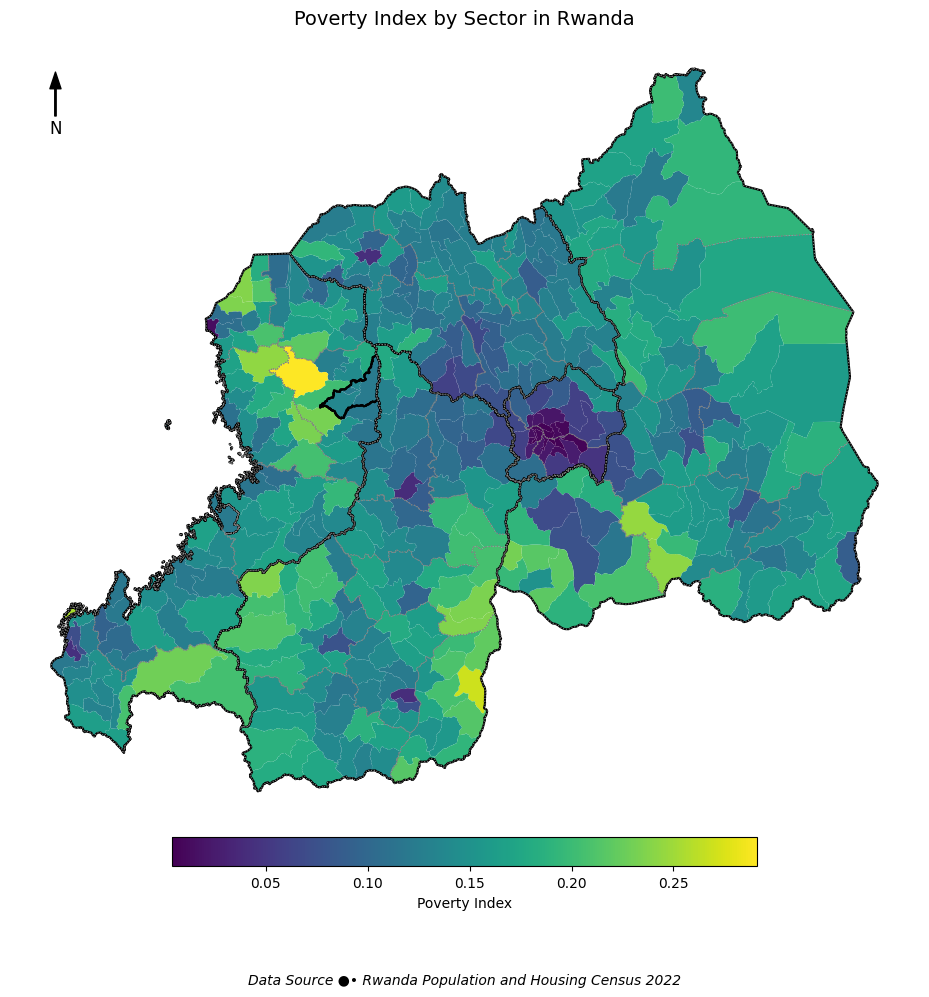

<Figure size 640x480 with 0 Axes>

In [45]:
def create_poverty_map(sectors_gdf, poverty_df, output_filename='rwanda_poverty_map.png'):
    """
    Create a detailed map visualization of poverty in Rwanda by sector.
    
    Parameters:
    -----------
    sectors_gdf : GeoDataFrame
        GeoDataFrame containing Rwanda sector boundaries
    poverty_df : DataFrame
        DataFrame containing poverty data with 'sector' and 'poverty_index' columns
    output_filename : str
        Filename to save the output map
        
    Returns:
    --------
    None (displays and saves the map)
    """
    # use Deja Vu sans
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    # Merge poverty data with sector boundaries
    # Ensure columns match - adjust column names as needed
    poverty_df = poverty_df.rename(columns={'sector': 'Name'})

    # Merge data
    poverty_map_data = sectors_gdf.merge(
        poverty_df[['Name']], on='Name', how='left')
    
    poverty_map_data['poverty_index'] = poverty_df['poverty_index']
    
    poverty_map = poverty_map_data
    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Create the map with a sequential colormap
    poverty_map = poverty_map_data.plot(
        column='poverty_index',
        cmap='viridis',
        legend=True,
        ax=ax,
        legend_kwds={
            'label': 'Poverty Index',
            'orientation': 'horizontal',
            'shrink': 0.5,
            'pad': 0.01
        }
    )

    # Add province boundaries
    province_boundaries = sectors_gdf.dissolve(by='Province')
    province_boundaries.boundary.plot(ax=ax, color='black', linewidth=1.5)

    # Add district boundaries
    district_boundaries = sectors_gdf.dissolve(by='District')
    district_boundaries.boundary.plot(
        ax=ax, color='gray', linewidth=0.8, linestyle=':')

    # Customize the map
    ax.set_title('Poverty Index by Sector in Rwanda', fontsize=14)
    ax.set_axis_off()

    # Add a north arrow
    x, y, arrow_length = 0.05, 0.95, 0.07
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='black', width=1, headwidth=8),
                ha='center', va='center', fontsize=12,
                xycoords=ax.transAxes)

    # Add data source annotation
    plt.figtext(0.5, 0.01,
                'Data Source ●• Rwanda Population and Housing Census 2022',
                ha='center', fontsize=10, style='italic')

    # Adjust layout
    plt.tight_layout()

    # Display the map
    plt.show()

    # Save the map
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')

    return

sectors_gdf = gpd.read_file("rwa_sector/Sector.shp")
poverty_df = pd.read_csv("final_dataset.csv")

create_poverty_map(sectors_gdf, poverty_df, output_filename='rwanda_poverty_map.png')

### $\text{Converting GEE data to tabular}$

### $\text{Resclaing Project's Scope}$